### Final Project Submission

* Student Name: Wes Swager
* Student Pace: Full Time
* Scheduled Project Review Date/Time: Friday, March 26, 2021
* Instructor Name: Claude Fried

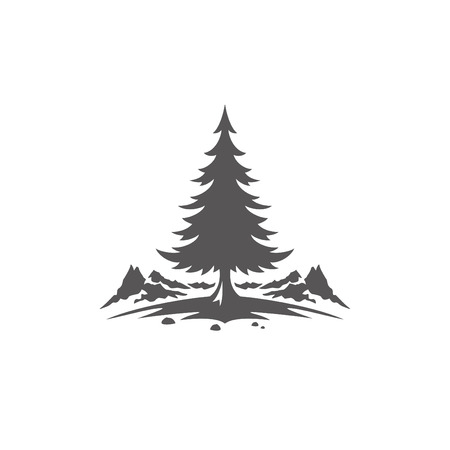

# <center><font color='green'> Evergreen Housing </center></font>

# Overview

Analyze data associated with houses sold in King County, Washington between September 9, 2014 and January, 10, 2015 and predict pricing using regression modeling.

# Business Problem

Evergreen Housing is a new house flipping startup looking to establish themselves in the east suburbs of Seattle, Washington.

House flipping is purchasing properties with the intent of selling them with the goal of making a profit.

In order to make a profit, most house flips involve improvements to the home which increase the value.  However, the cost of these improvements must be accounted for, so earning a profit requires selling for more than the amount paid initially plus plus the cost of the improvements.  

The most common improvements will be basic repairs and/or cosmetic renovations, however, for some properties Evergreen Housing may look to make more significant additions to the house via construction.

In order to better assess whether additions which require construction are worthwhile, Evergreen Housing have requested input regarding which features will increase the value of homes and a model predicting pricing. 

# Packages

In [1]:
# Import Pandas for Dataframes

import pandas as pd

# Import Numpy and Math for mathematical functions

import numpy as np
import math

# Import statsmodels and Scipy Stats for statistical functions

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

# Import Matplotlib and Seaborn for visualizations

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Import Scikit-learn for modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Import pickle for saving model(s)

import pickle

# Data

## King County House Sales Data

Data associated with houses sold in King County, Washington between September 9, 2014 and January, 10, 2015.

In [2]:
# Import King County House Sales dataset

kc_houses = pd.read_csv(r'C:\Users\westi\Documents\GitHub\dsc-phase-2-project\data\kc_house_data.csv')
kc_houses.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

# Descriptions of column names for data set

* **id** - Unique identification number for each house
* **dateDate** - Date sold
* **pricePrice** -  Price sold for
* **bedroomsNumber** -  Number of bedrooms
* **bathroomsNumber** -  Number of bathrooms
* **sqft_livingsquare** -  Square footage of house
* **sqft_lotsquare** -  Square footage of lot
* **floorsTotal** -  Number of floors
* **waterfront** - If house has a view to a waterfront
* **view** - If house was viewed
* **condition** - Rating of overall house condition, one-through-five
* **grade** - Grade from King County grading system, one-through-thirteen
* **sqft_above** - Square of house above groun-level, not including basement
* **sqft_basement** - Square footage of basement
* **yr_built** - Year built
* **yr_renovated** - Most recent year renovated
* **zipcode** - Zipcode
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - Average square footage of house for nearest fifteen neighbors
* **sqft_lot15** - Average square footage of lot for nearest fifteen neighbors

### Data Exploration

In [3]:
# Check initial kc_houses data types and row counts
# Check intitial kc_houses for NA values

kc_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# Check kc_houses initial mean, standard deviation, and five-point statistics

kc_houses.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

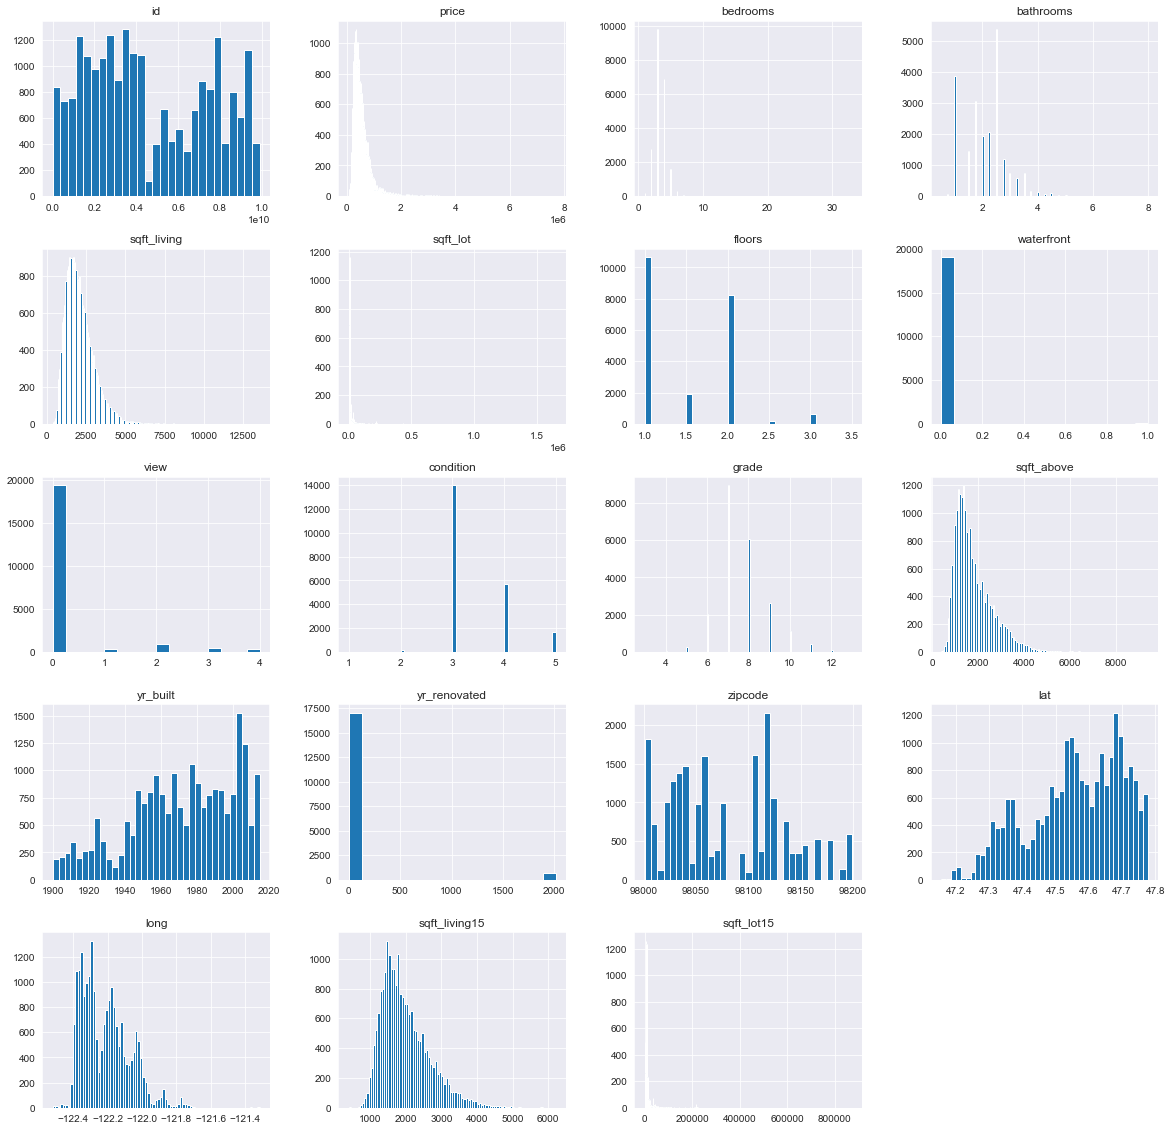

In [5]:
# Visualize the distribution of the initial kc_houses data with histograms

kc_houses.hist(figsize=(20,20), bins = 'auto');

id  date     price  bedrooms  bathrooms  sqft_living  \
id             1.000000   NaN -0.016772  0.001150   0.005162    -0.012241   
price         -0.016772   NaN  1.000000  0.308787   0.525906     0.701917   
bedrooms       0.001150   NaN  0.308787  1.000000   0.514508     0.578212   
bathrooms      0.005162   NaN  0.525906  0.514508   1.000000     0.755758   
sqft_living   -0.012241   NaN  0.701917  0.578212   0.755758     1.000000   
sqft_lot      -0.131911   NaN  0.089876  0.032471   0.088373     0.173453   
floors         0.018608   NaN  0.256804  0.177944   0.502582     0.353953   
waterfront    -0.004176   NaN  0.276295 -0.002386   0.067282     0.110230   
view           0.011592   NaN  0.395734  0.078523   0.186451     0.282532   
condition     -0.023803   NaN  0.036056  0.026496  -0.126479    -0.059445   
grade          0.008188   NaN  0.667951  0.356563   0.665838     0.762779   
sqft_above    -0.010799   NaN  0.605368  0.479386   0.686668     0.876448   
yr_built       0.021617   NaN  0.053953  0.155670   0.507173     0.318152   
yr_renovated  -0.012010   NaN  0.129599  0.018495   0.051050     0.055660   
zipcode       -0.008211   NaN -0.053402 -0.154092  -0.204786    -0.199802   
lat           -0.001798   NaN  0.306692 -0.009951   0.024280     0.052155   
long           0.020672   NaN  0.022036  0.132054   0.224903     0.241214   
sqft_living15 -0.002701   NaN  0.585241  0.393406   0.569884     0.756402   
sqft_lot15    -0.138557   NaN  0.082845  0.030690   0.088303     0.184342   

               sqft_lot    floors  waterfront      view  ...     grade  \
id            -0.131911  0.018608   -0.004176  0.011592  ...  0.008188   
price          0.089876  0.256804    0.276295  0.395734  ...  0.667951   
bedrooms       0.032471  0.177944   -0.002386  0.078523  ...  0.356563   
bathrooms      0.088373  0.502582    0.067282  0.186451  ...  0.665838   
sqft_living    0.173453  0.353953    0.110230  0.282532  ...  0.762779   
sqft_lot       1.000000 -0.004814    0.023143  0.075298  ...  0.114731   
floors        -0.004814  1.000000    0.021883  0.028436  ...  0.458794   
waterfront     0.023143  0.021883    1.000000  0.406654  ...  0.087383   
view           0.075298  0.028436    0.406654  1.000000  ...  0.249727   
condition     -0.008830 -0.264075    0.017642  0.045735  ... -0.146896   
grade          0.114731  0.458794    0.087383  0.249727  ...  1.000000   
sqft_above     0.184139  0.523989    0.075463  0.166299  ...  0.756073   
yr_built       0.052946  0.489193   -0.026079 -0.054564  ...  0.447865   
yr_renovated   0.004513  0.003535    0.087244  0.100964  ...  0.016669   
zipcode       -0.129586 -0.059541    0.031057  0.085277  ... -0.185771   
lat           -0.085514  0.049239   -0.012772  0.006141  ...  0.113575   
long           0.230227  0.125943   -0.039864 -0.077894  ...  0.200341   
sqft_living15  0.144763  0.280102    0.088860  0.279561  ...  0.713867   
sqft_lot15     0.718204 -0.010722    0.032002  0.073332  ...  0.120981   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010799            NaN  0.021617     -0.012010 -0.008211   
price            0.605368            NaN  0.053953      0.129599 -0.053402   
bedrooms         0.479386            NaN  0.155670      0.018495 -0.154092   
bathrooms        0.686668            NaN  0.507173      0.051050 -0.204786   
sqft_living      0.876448            NaN  0.318152      0.055660 -0.199802   
sqft_lot         0.184139            NaN  0.052946      0.004513 -0.129586   
floors           0.523989            NaN  0.489193      0.003535 -0.059541   
waterfront       0.075463            NaN -0.026079      0.087244  0.031057   
view             0.166299            NaN -0.054564      0.100964  0.085277   
condition       -0.158904            NaN -0.361592     -0.061858  0.002888   
grade            0.756073            NaN  0.447865      0.016669 -0.185771   
sqft_above       1.000000            NaN  0.424037      0.02213

<AxesSubplot:>

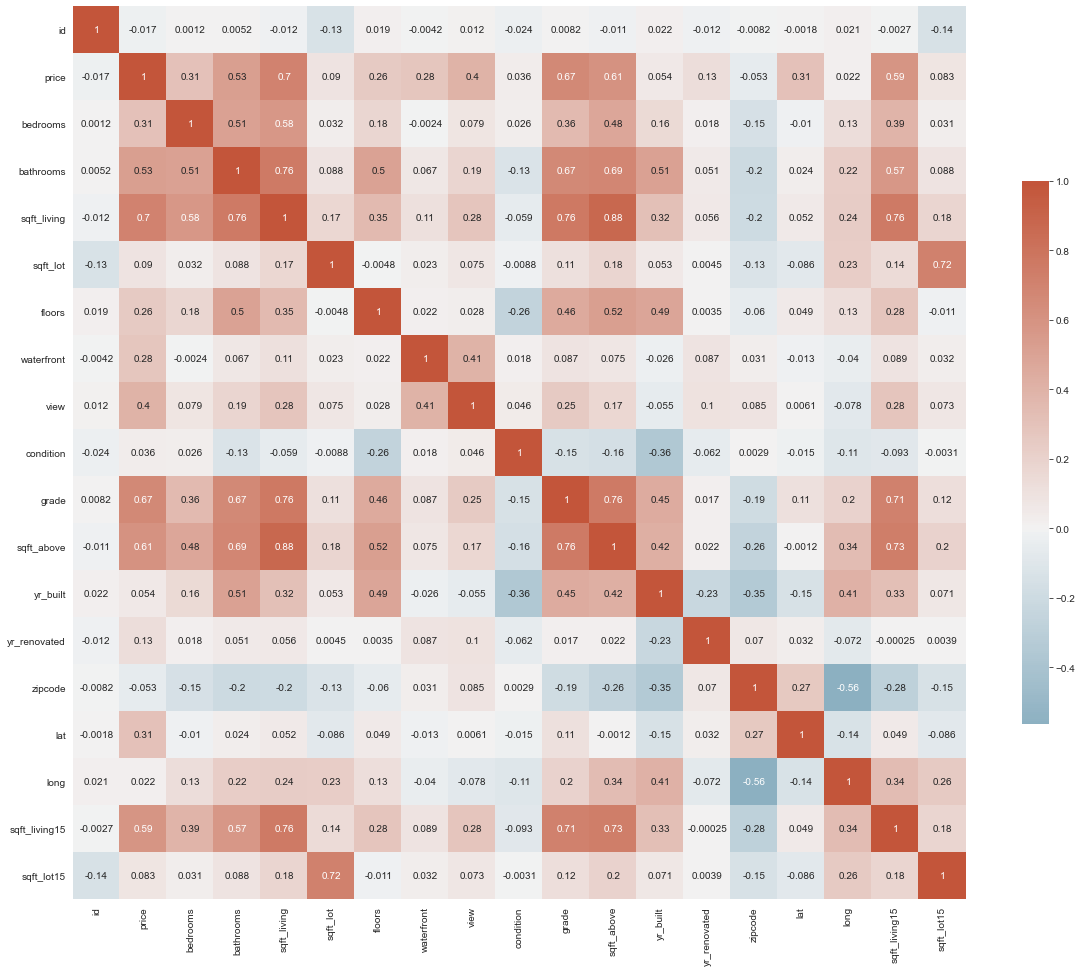

In [6]:
# Calculate multicollinearity of initial kc_houses data

correlation = kc_houses.corr()

display(pd.DataFrame(correlation,
                     columns = list(kc_houses.columns)))

# Visualize correlation of initial kc_houses data

f, ax = plt.subplots(figsize = (20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(correlation, cmap = cmap, center = 0, square = True, 
            cbar_kws = {"shrink" : 0.5}, annot = True)

# Data Cleaning

### Remove Fields

In [7]:
# Remove columns from kc_house_data unnecessary for this project
# based on the Pusiness Problem

# Remove features not associated with the physical features of the home:
# 'id', 'date', 'view', 'sqft_living15', and 'sqft_lot15'

# Remove features which cannot be improved through construction: 
# 'waterfront', 'sqft_basement', 'zipcode', 'lat', and 'long'

# Remove redundent features: 'sqft_above', in context, is the same as
# 'sqft_living'

kc_houses.drop(['id',
                'date',
                'sqft_lot',
                'waterfront',
                'view',
                'sqft_above',
                'sqft_basement',
                'yr_renovated',
                'zipcode',
                'lat',
                'long',
                'sqft_living15',
                'sqft_lot15'],
                axis = 1, inplace = True)

## Field Exploration and Cleaning

### Functions

In [8]:
# Save initial kc_houses row count

initial_count = len(kc_houses)

# Count outliers visible from plot and five-point statistics
# Calculate percentage of outliers v intitial_count

def outliers_greater (field, value):
    print((kc_houses[field] > value).sum())
    print(((kc_houses[field] > value).sum()) / initial_count)

def outliers_less (field, value):
    print((kc_houses[field] < value).sum())
    print(((kc_houses[field] < value).sum()) / initial_count)
    
def outliers_equal (field, value):
    print((kc_houses[field] == value).sum())
    print(((kc_houses[field] == value).sum()) / initial_count)

In [9]:
# First concept for accounting for outliers:
# Replace outliers with the median value

def replace_outliers(field, quantity):
    x = kc_houses[field].mean()
    kc_houses[field] = np.where(kc_houses[field] > quantity,
                                x,
                                kc_houses[field])

In [10]:
# Second concept for accounting for outliers:
# Drop rows containing outliers

def drop_outliers(field_outliers):
    kc_houses.drop(kc_houses[field_outliers].index, inplace = True)

### Bedrooms

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


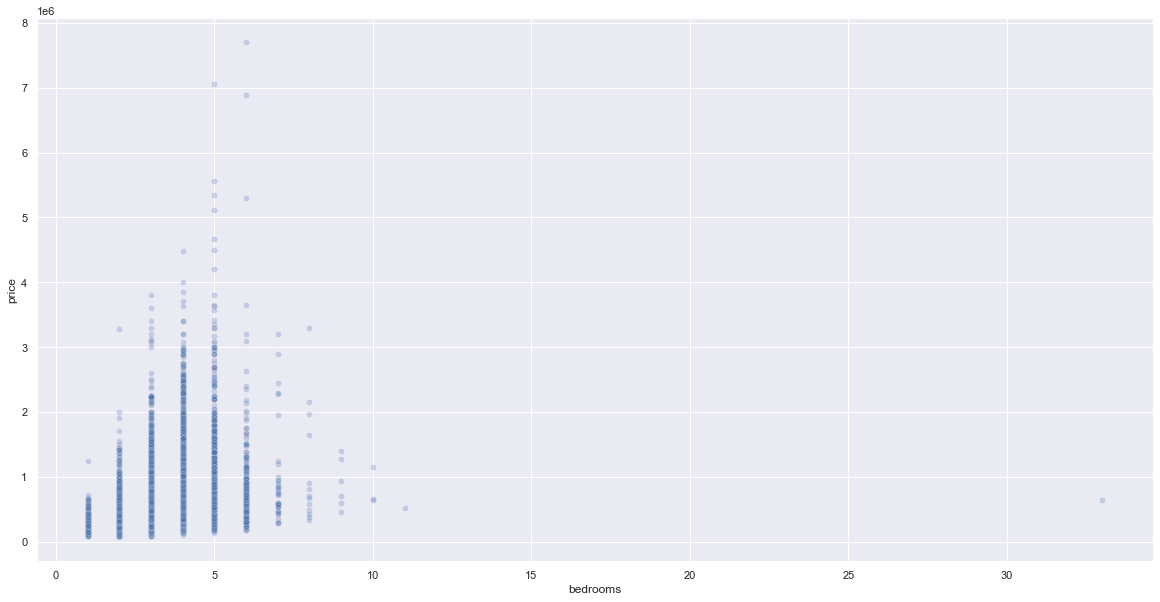

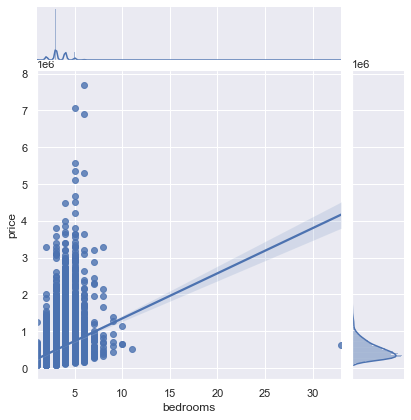

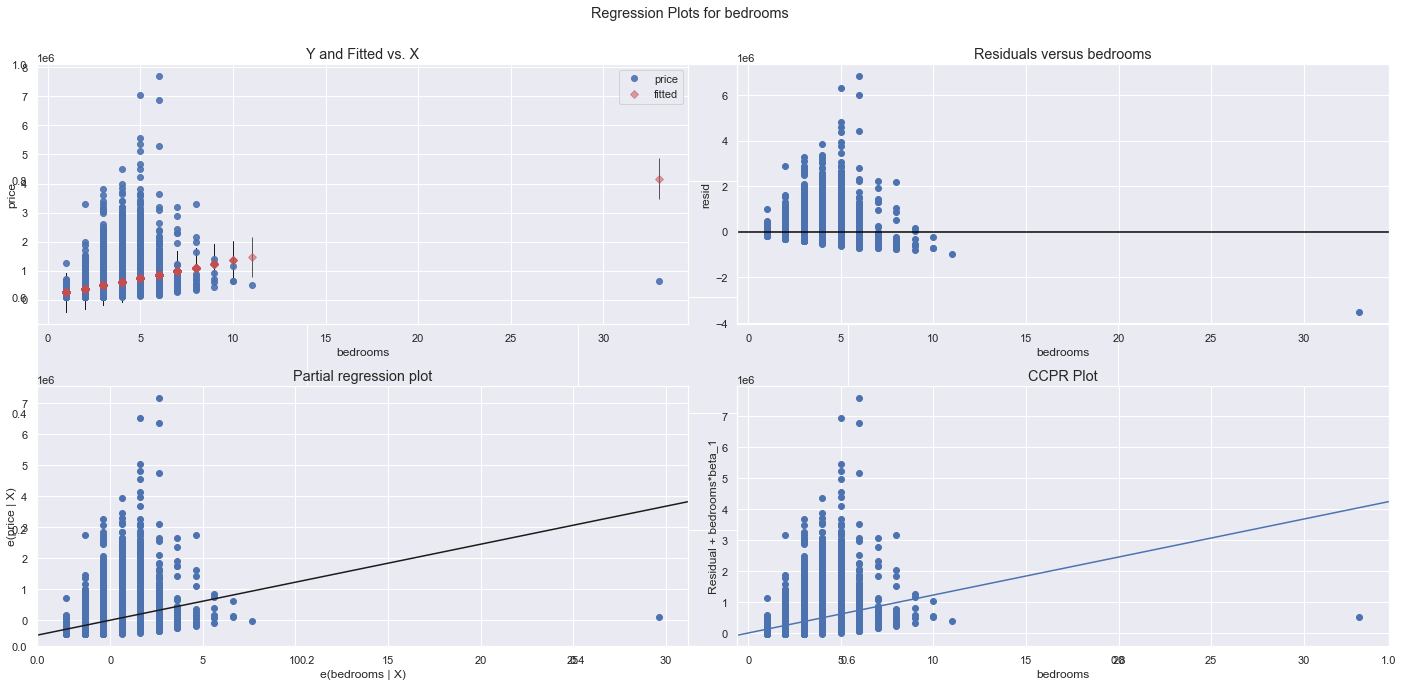

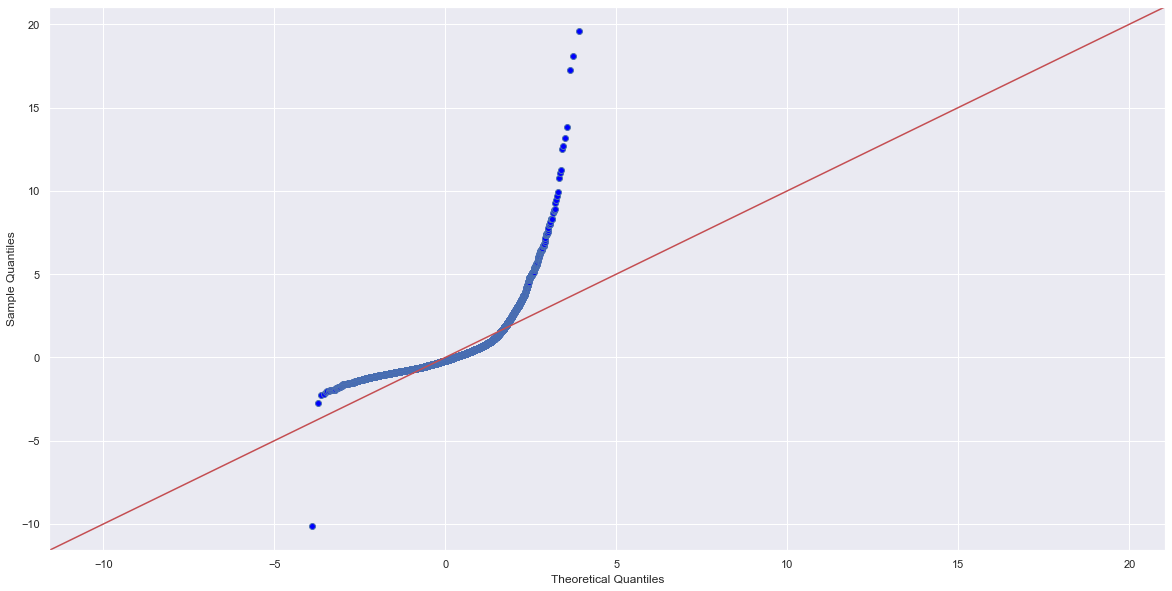

In [11]:
# Check kc_houses['bedrooms'] initial mean, standard deviation, 
# and five-point statistics

print(kc_houses['bedrooms'].describe())

# Visualize initial kc_houses['bedrooms'] v kc_houses['price']

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.scatterplot(x = 'bedrooms',
                                          y = 'price',
                                          data = kc_houses,
                                         alpha = 0.25)

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.jointplot(data = kc_houses, 
                                        x = 'bedrooms', 
                                        y = 'price', 
                                        kind = 'reg')

bedrooms_model1 = smf.ols(formula = f'price ~ bedrooms', data = kc_houses).fit()

fig, axes = plt.subplots(figsize = (20, 10))
fig = sm.graphics.plot_regress_exog(bedrooms_model1, 'bedrooms', fig = fig)
fig = sm.graphics.qqplot(bedrooms_model1.resid, dist = stats.norm, line = '45', fit = True)
plt.show()

In [12]:
# Define kc_houses['bedrooms'] outliers

bedrooms_outliers = kc_houses['bedrooms'] > 6

outliers_greater('bedrooms', 6)

62
0.002870769088299301


In [13]:
# Drop bedroom outliers
# Bedroom outliers account for only 0.28% of total data

drop_outliers(bedrooms_outliers)

count    21535.000000
mean         3.359786
std          0.875090
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: bedrooms, dtype: float64


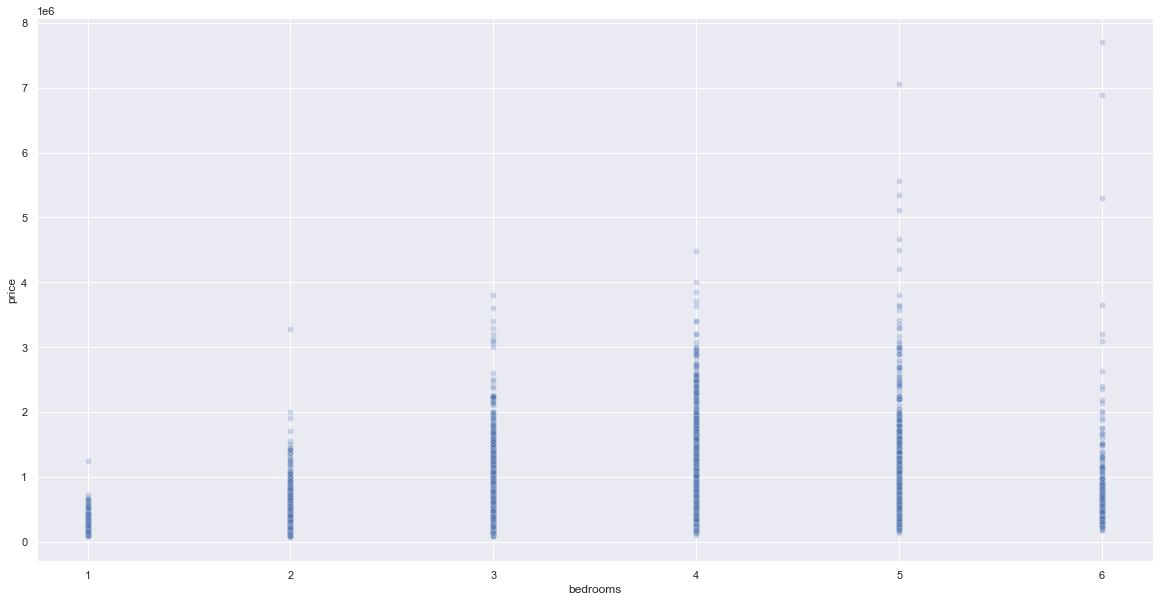

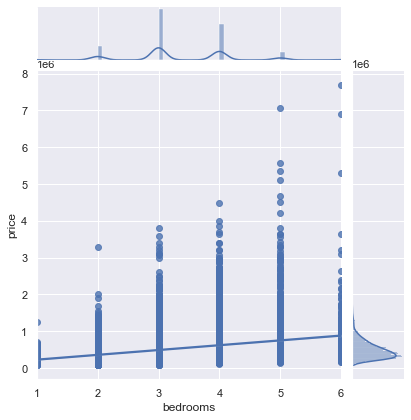

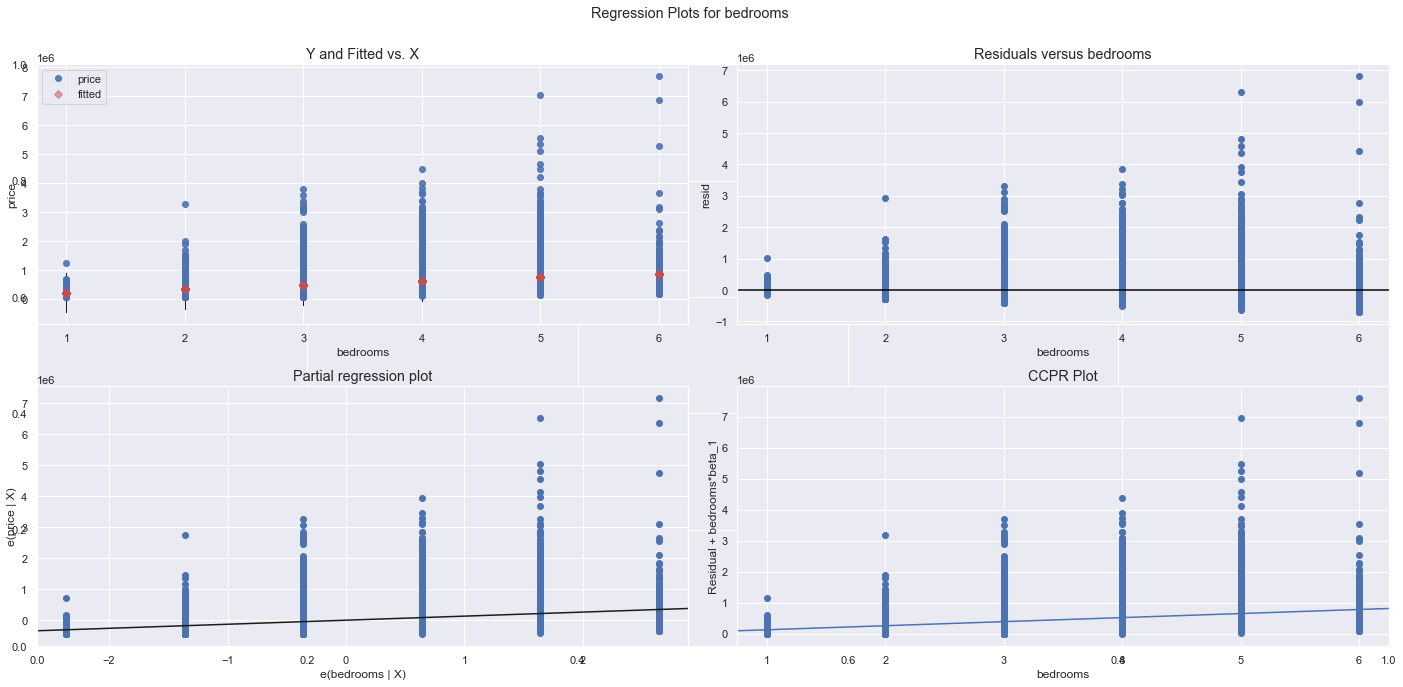

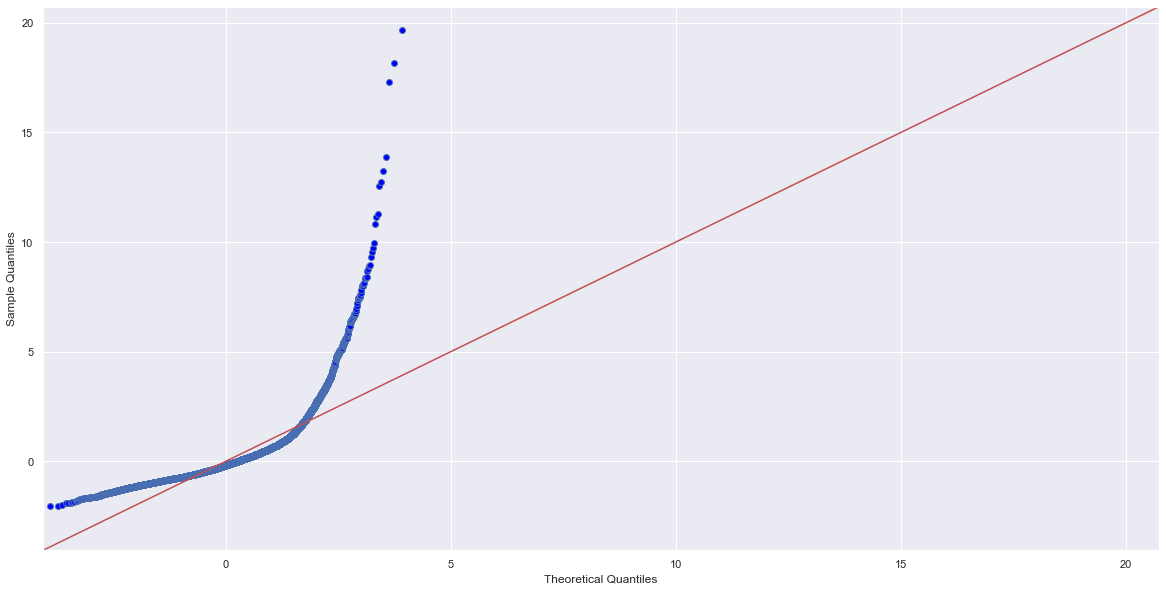

In [14]:
# Check kc_houses['bedrooms'] updated mean, standard deviation, 
# and five-point statistics

print(kc_houses['bedrooms'].describe())

# Visualize updated kc_houses['bedrooms'] v kc_houses['price']

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.scatterplot(x = 'bedrooms',
                                          y = 'price',
                                          data = kc_houses,
                                         alpha = 0.25)

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.jointplot(data = kc_houses, 
                                        x = 'bedrooms', 
                                        y = 'price', 
                                        kind = 'reg')

bedrooms_model2 = smf.ols(formula = f'price ~ bedrooms', data = kc_houses).fit()

fig, axes = plt.subplots(figsize = (20, 10))
fig = sm.graphics.plot_regress_exog(bedrooms_model2, 'bedrooms', fig = fig)
fig = sm.graphics.qqplot(bedrooms_model2.resid, dist = stats.norm, line = '45', fit = True)
plt.show()

### Bathrooms

count    21535.000000
mean         2.111400
std          0.762291
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


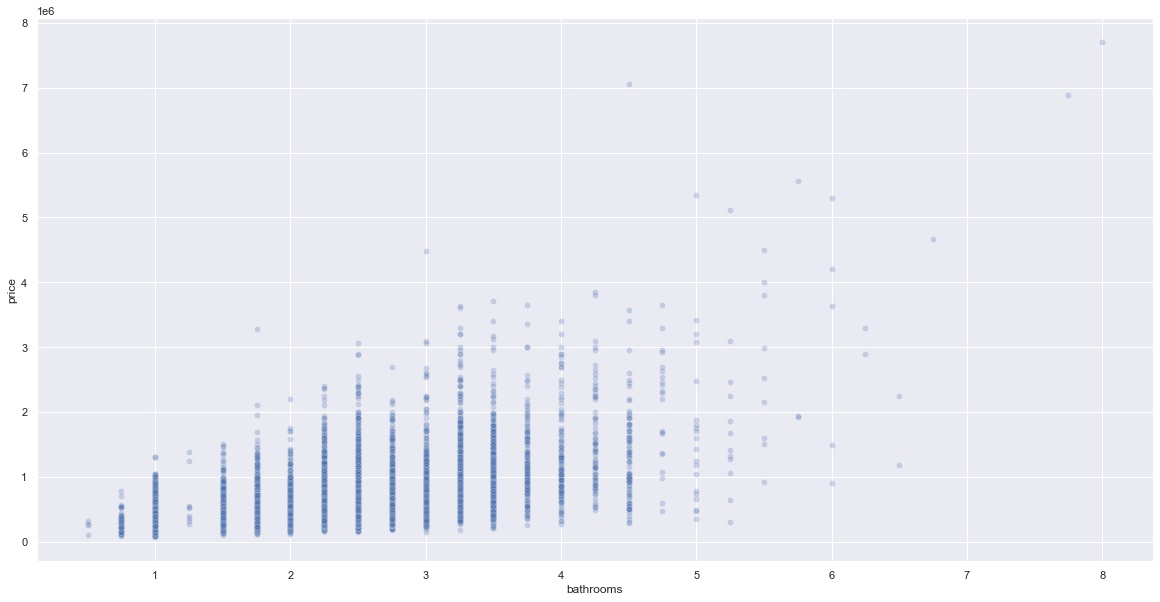

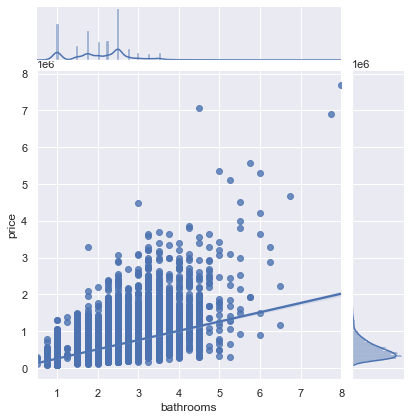

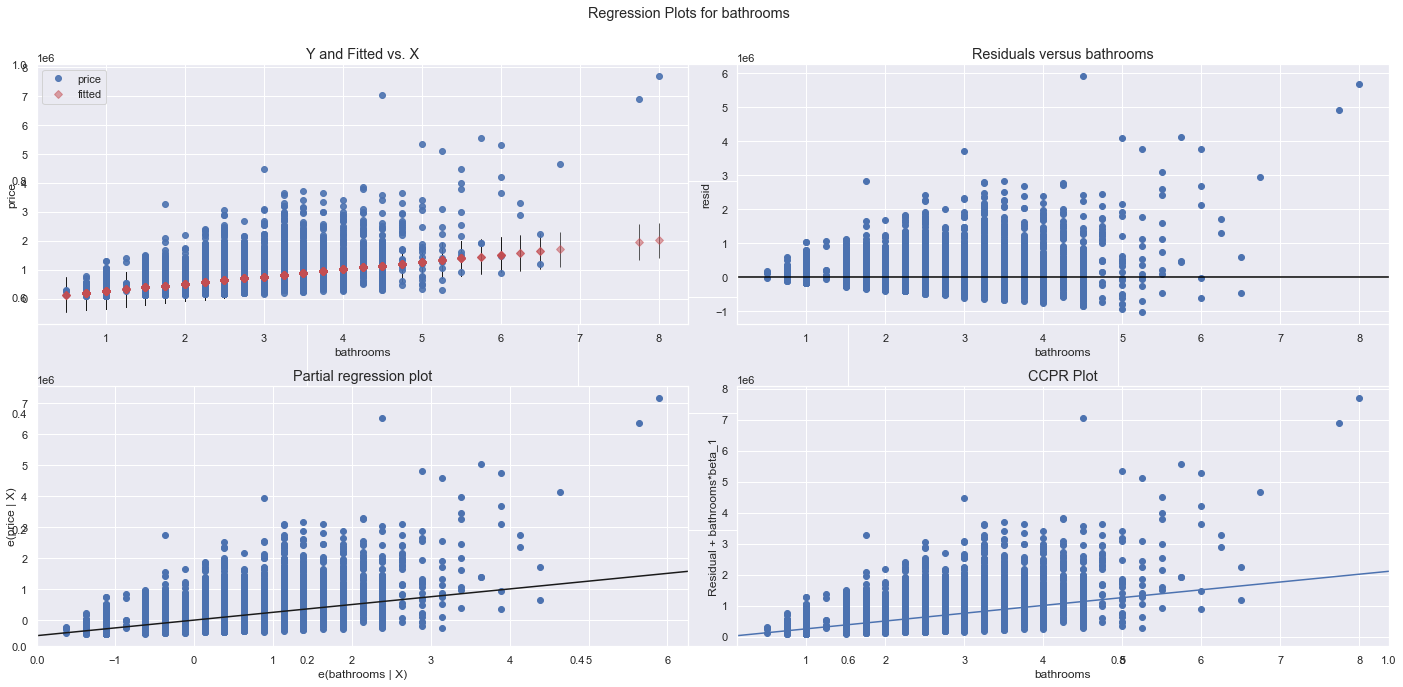

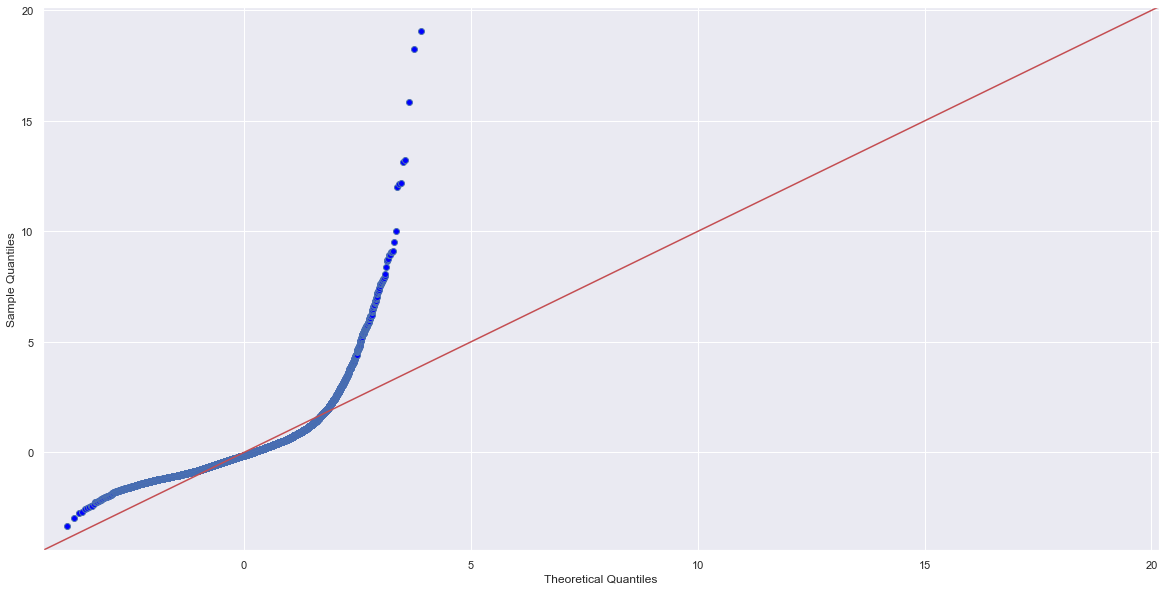

In [15]:
# Check kc_houses['bathrooms'] initial mean, standard deviation, 
# and five-point statistics

print(kc_houses['bathrooms'].describe())

# Visualize initial kc_houses['bathrooms'] v kc_houses['price']

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.scatterplot(x = 'bathrooms',
                                          y = 'price',
                                          data = kc_houses,
                                         alpha = .25)

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.jointplot(data = kc_houses, 
                                        x = 'bathrooms', 
                                        y = 'price', 
                                        kind = 'reg')

bathrooms_model1 = smf.ols(formula = f'price ~ bathrooms', data = kc_houses).fit()

fig, axes = plt.subplots(figsize = (20, 10))
fig = sm.graphics.plot_regress_exog(bathrooms_model1, 'bathrooms', fig = fig)
fig = sm.graphics.qqplot(bathrooms_model1.resid, dist = stats.norm, line = '45', fit = True)
plt.show()

In [16]:
# Define kc_houses['bathrooms'] outliers

bathrooms_outliers = kc_houses['bathrooms'] > 4.5

outliers_greater('bathrooms', 4.5)

77
0.003565309996758809


In [17]:
# Drop bathroom outliers
# Bathroom outliers account for only 0.35% of total data

drop_outliers(bathrooms_outliers)

count    21458.000000
mean         2.099986
std          0.738416
min          0.500000
25%          1.500000
50%          2.250000
75%          2.500000
max          4.500000
Name: bathrooms, dtype: float64


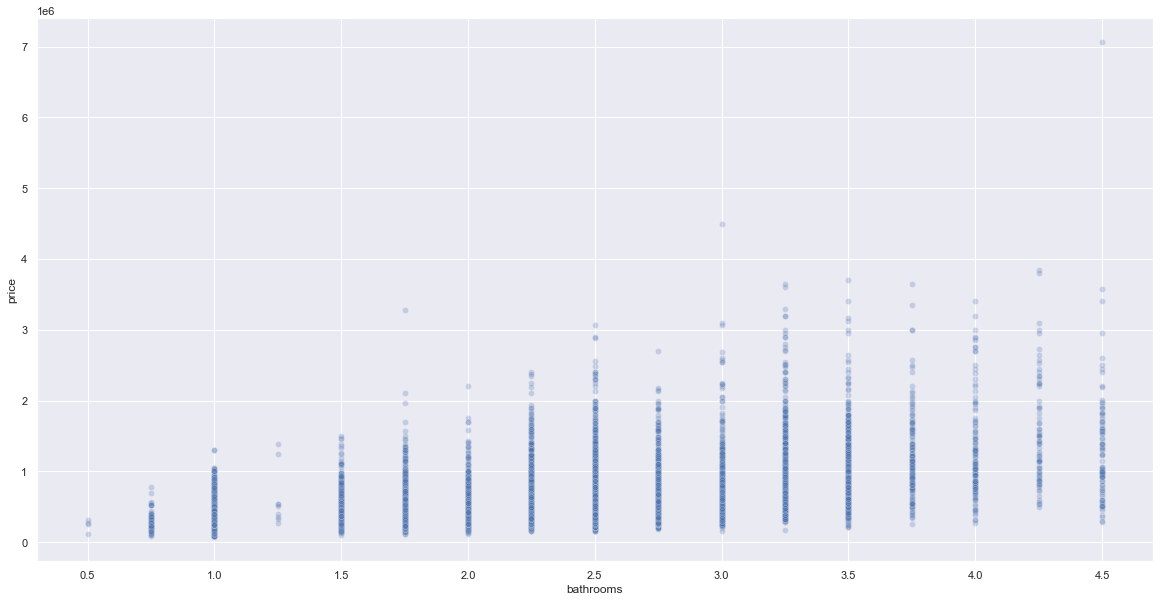

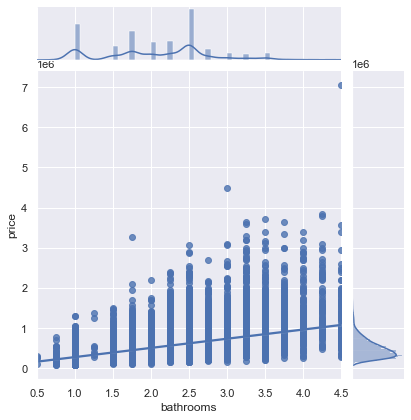

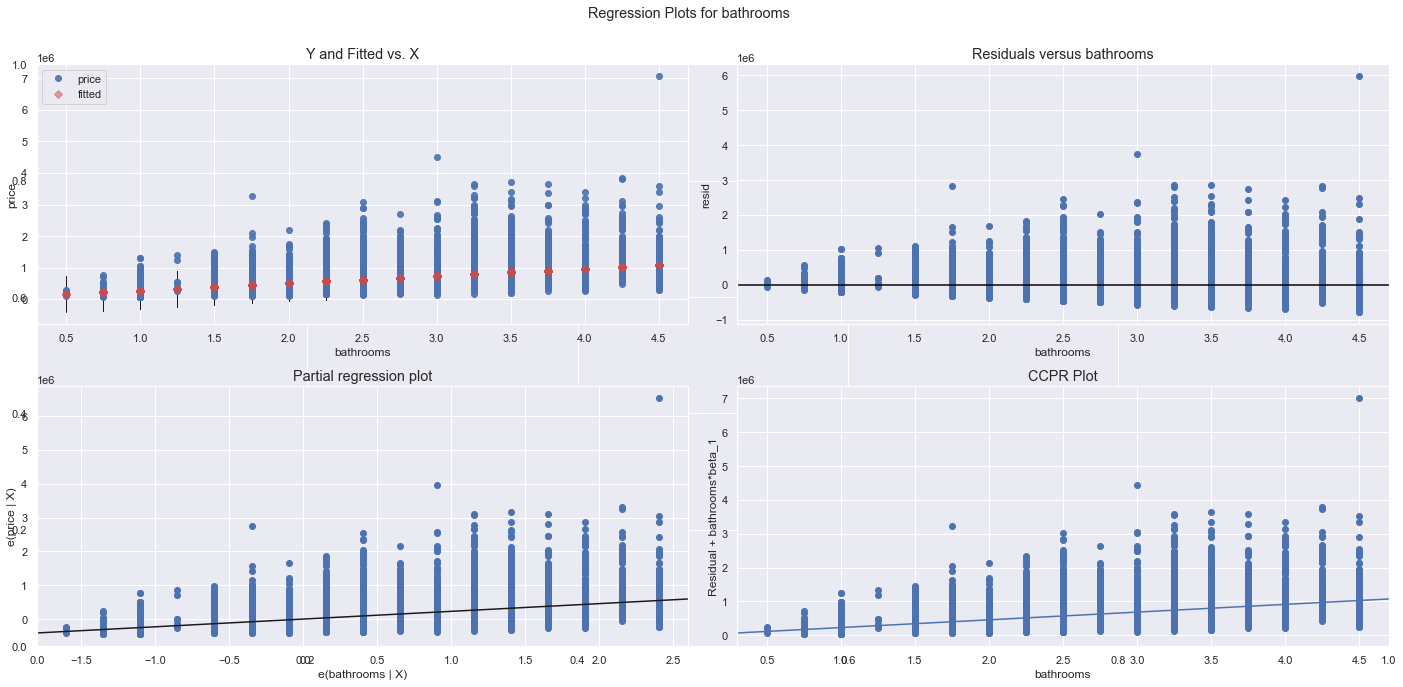

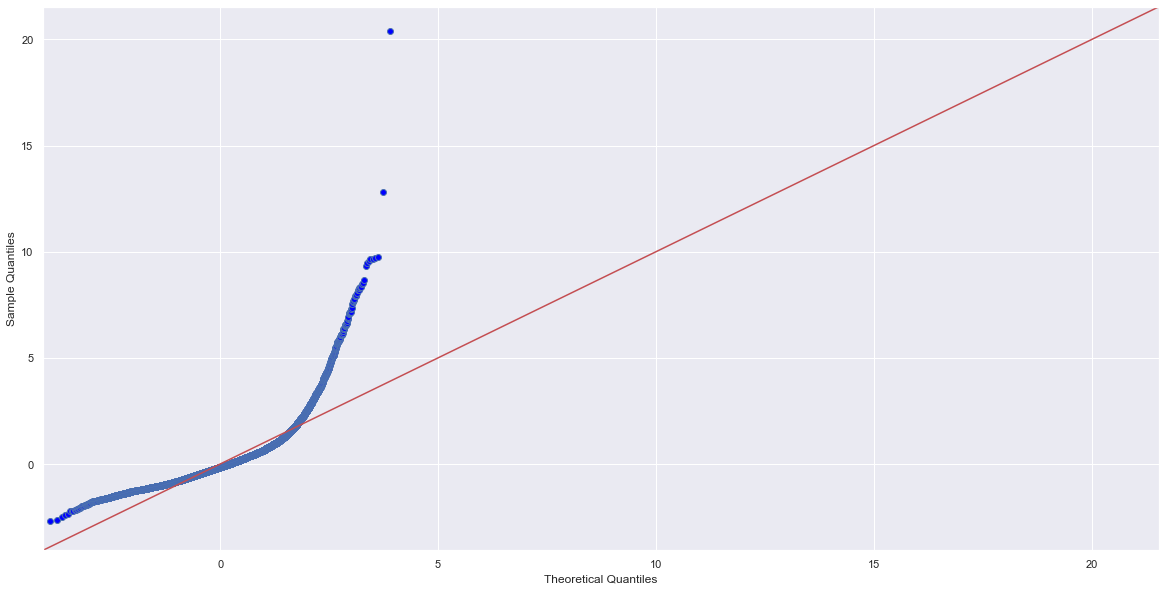

In [18]:
# Check kc_houses['bathrooms'] updated mean, standard deviation, 
# and five-point statistics

print(kc_houses['bathrooms'].describe())

# Visualize updated kc_houses['bathrooms'] v kc_houses['price']

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.scatterplot(x = 'bathrooms',
                                          y = 'price',
                                          data = kc_houses,
                                         alpha = 0.25)

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.jointplot(data = kc_houses, 
                                        x = 'bathrooms', 
                                        y = 'price', 
                                        kind = 'reg')

bathrooms_model2 = smf.ols(formula = f'price ~ bathrooms', data = kc_houses).fit()

fig, axes = plt.subplots(figsize = (20, 10))
fig = sm.graphics.plot_regress_exog(bathrooms_model2, 'bathrooms', fig = fig)
fig = sm.graphics.qqplot(bathrooms_model2.resid, dist = stats.norm, line = '45', fit = True)
plt.show()

### Square Footage of House

count    21458.000000
mean      2061.740703
std        876.919460
min        370.000000
25%       1420.000000
50%       1910.000000
75%       2530.750000
max      10040.000000
Name: sqft_living, dtype: float64


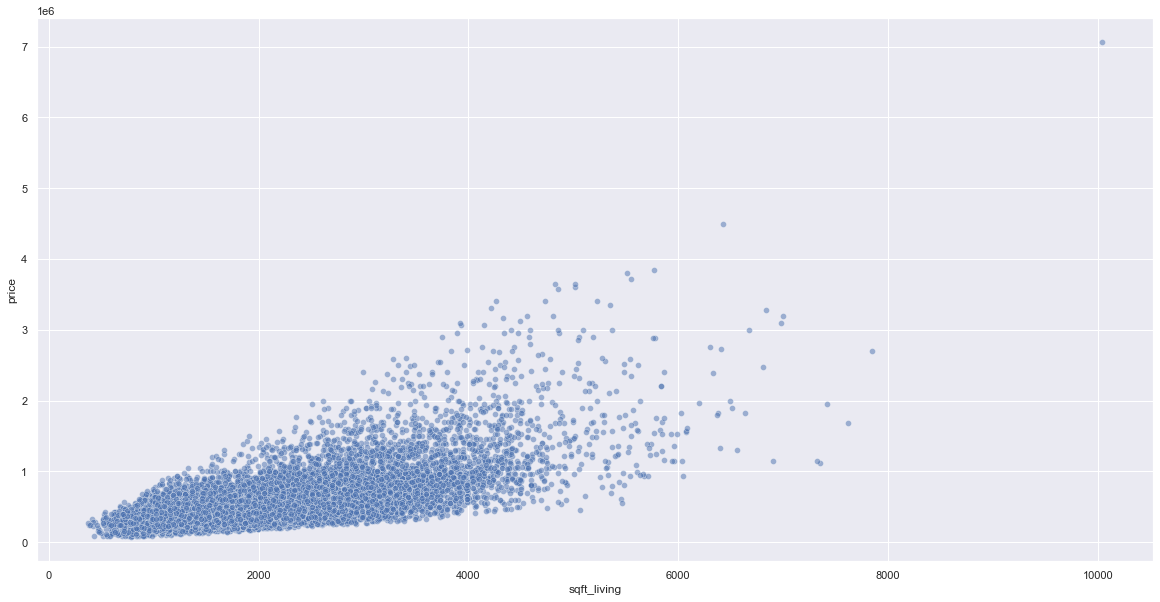

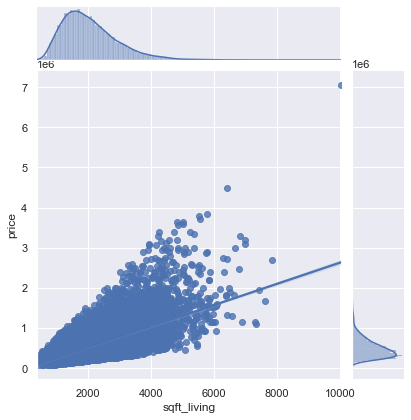

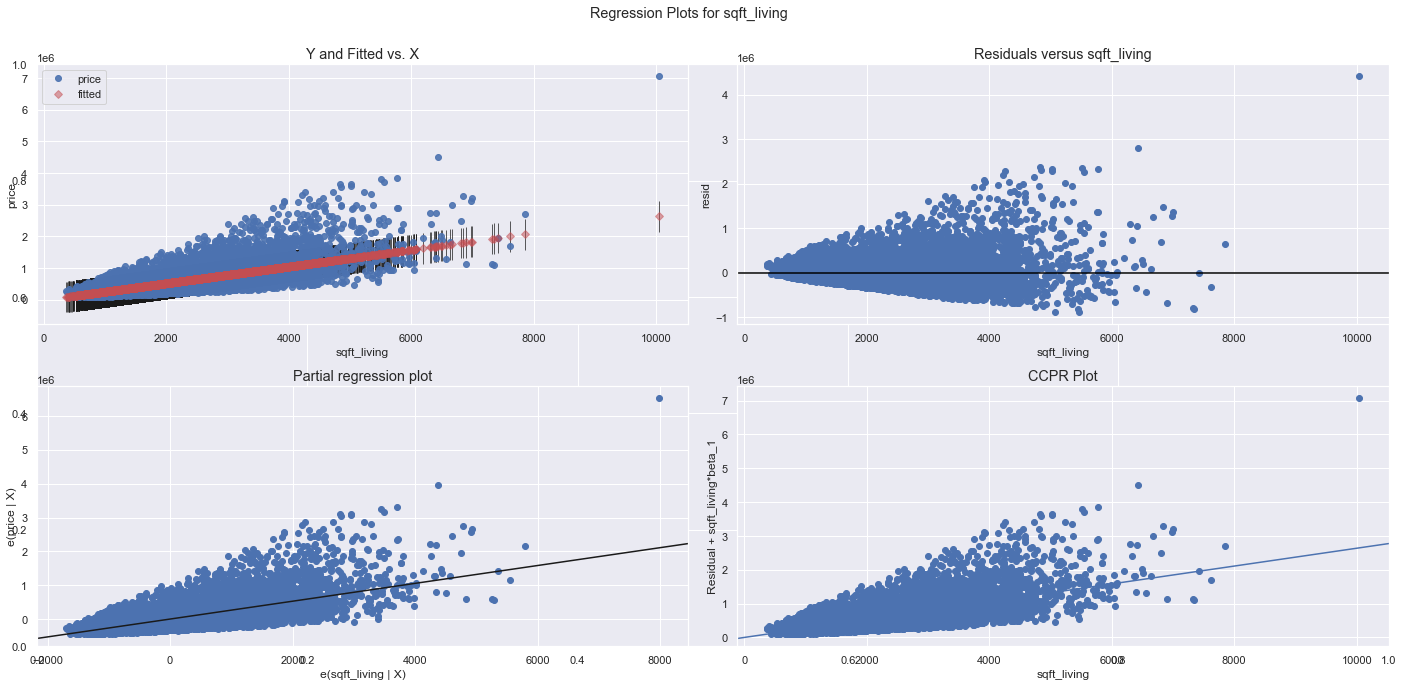

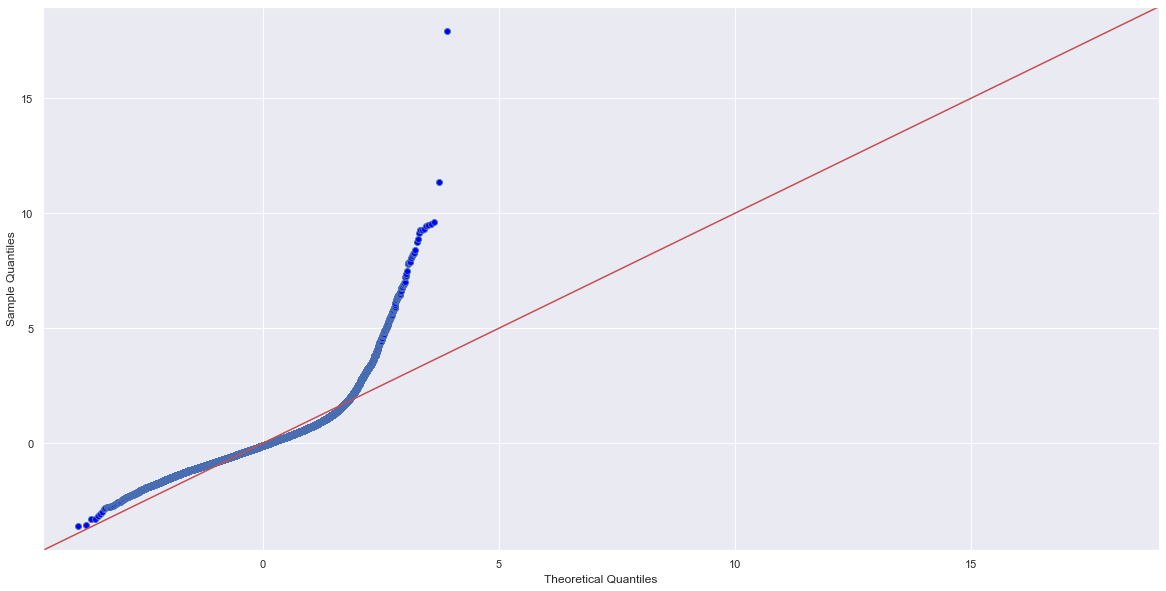

In [19]:
# Check kc_houses['sqft_living'] initial mean, standard deviation, 
# and five-point statistics

print(kc_houses['sqft_living'].describe())

# Visualize initial kc_houses['sqft_living'] v kc_houses['price']

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.scatterplot(x = 'sqft_living',
                                          y = 'price',
                                          data = kc_houses,
                                         alpha = 0.5)

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.jointplot(data = kc_houses, 
                                        x = 'sqft_living', 
                                        y = 'price', 
                                        kind = 'reg')

sqft_living_model1 = smf.ols(formula = f'price ~ sqft_living', data = kc_houses).fit()

fig, axes = plt.subplots(figsize = (20, 10))
fig = sm.graphics.plot_regress_exog(sqft_living_model1, 'sqft_living', fig = fig)
fig = sm.graphics.qqplot(sqft_living_model1.resid, dist = stats.norm, line = '45', fit = True)
plt.show()

In [20]:
# Define kc_houses['sqft_living'] outliers

sqft_living_outliers = kc_houses['sqft_living'] > 4000

outliers_greater('sqft_living', 4000)

695
0.032180395425290546


In [21]:
# Drop sqft_living outliers
# sqft_living outliers account for only 1.35% of total data

drop_outliers(sqft_living_outliers)

count    20763.000000
mean      1975.206088
std        740.702788
min        370.000000
25%       1410.000000
50%       1870.000000
75%       2460.000000
max       4000.000000
Name: sqft_living, dtype: float64


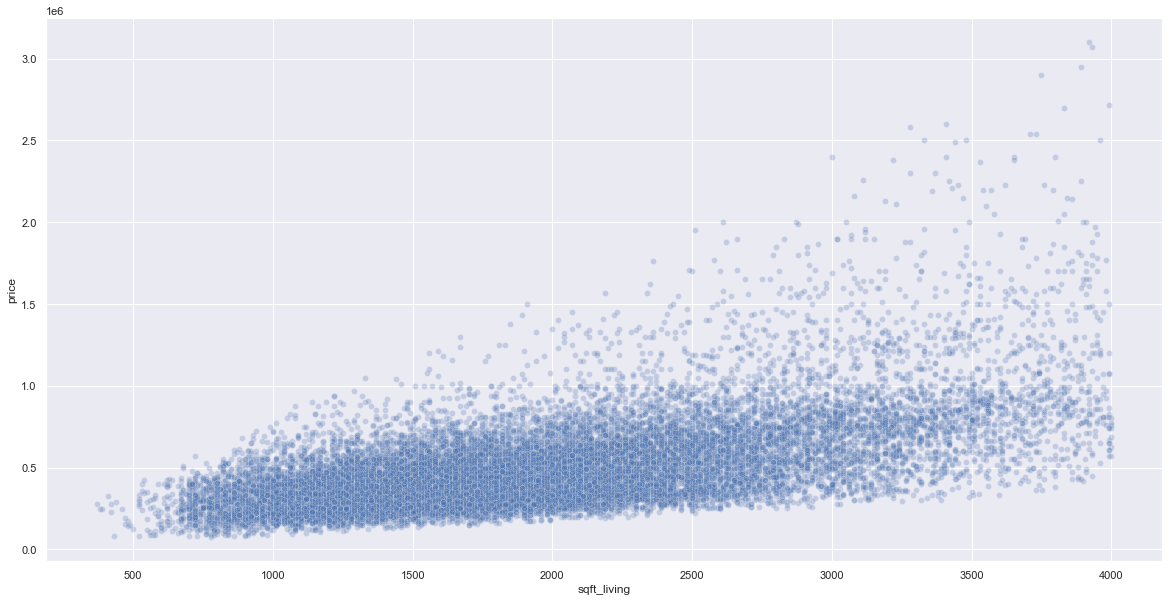

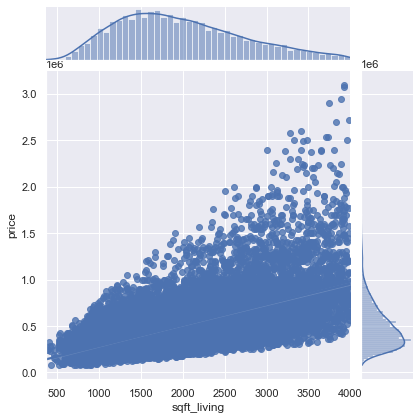

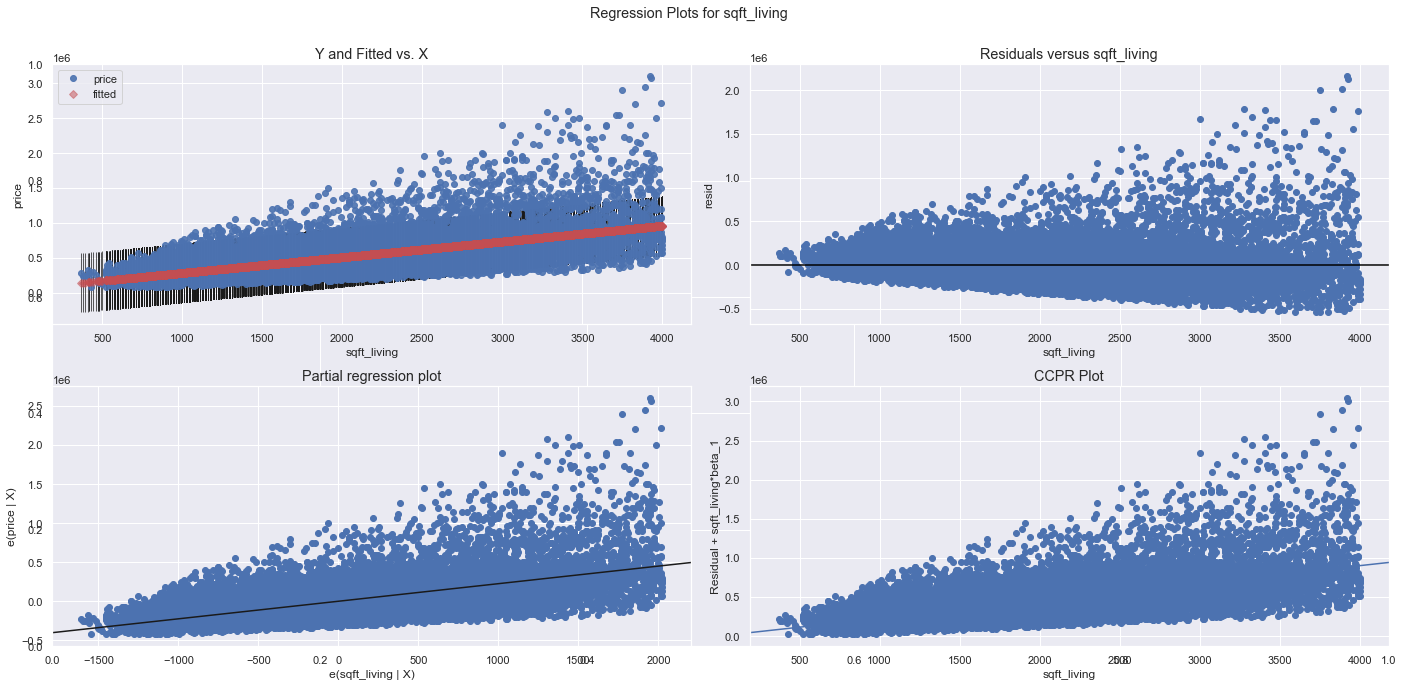

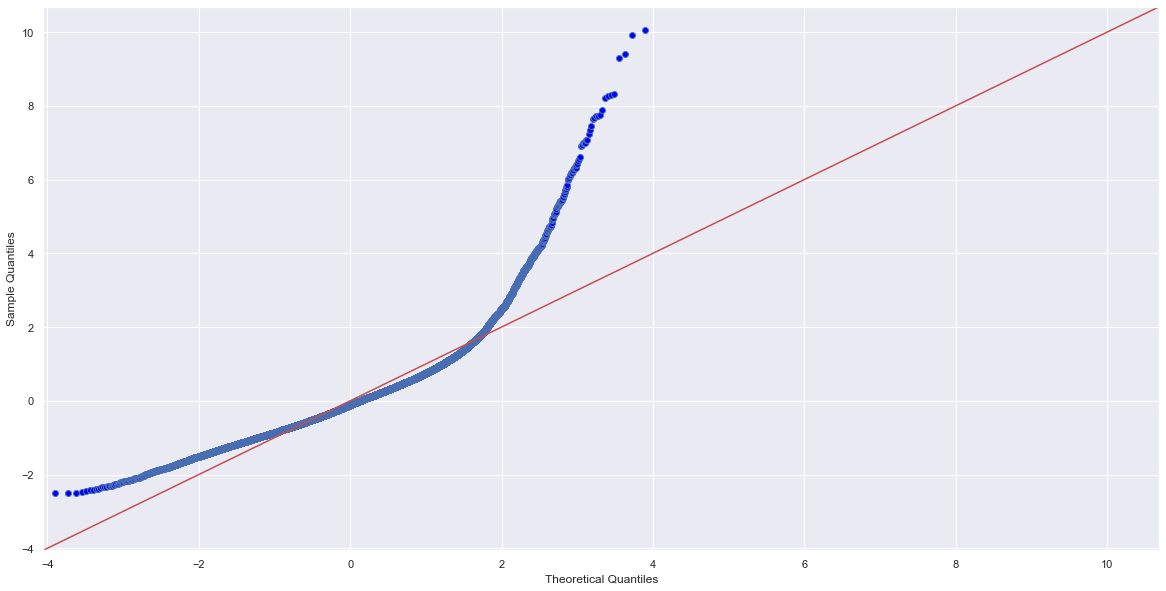

In [22]:
# Check kc_houses['sqft_living'] updated mean, standard deviation, 
# and five-point statistics

print(kc_houses['sqft_living'].describe())

# Visualize updated kc_houses['sqft_living'] v kc_houses['price']

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.scatterplot(x = 'sqft_living',
                                          y = 'price',
                                          data = kc_houses,
                                         alpha = 0.25)

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.jointplot(data = kc_houses, 
                                        x = 'sqft_living', 
                                        y = 'price', 
                                        kind = 'reg')

sqft_living_model2 = smf.ols(formula = f'price ~ sqft_living', data = kc_houses).fit()

fig, axes = plt.subplots(figsize = (20, 10))
fig = sm.graphics.plot_regress_exog(sqft_living_model2, 'sqft_living', fig = fig)
fig = sm.graphics.qqplot(sqft_living_model2.resid, dist = stats.norm, line = '45', fit = True)
plt.show()

### Floors

count    20763.000000
mean         1.477725
std          0.537866
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.500000
Name: floors, dtype: float64


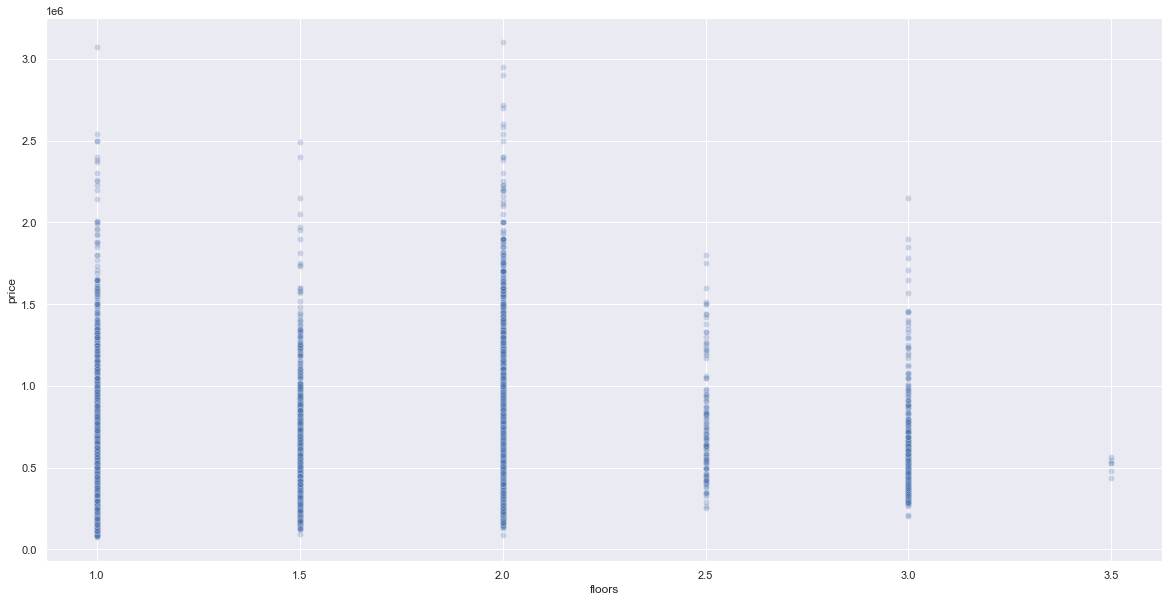

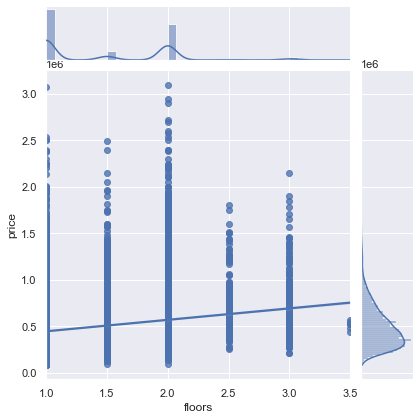

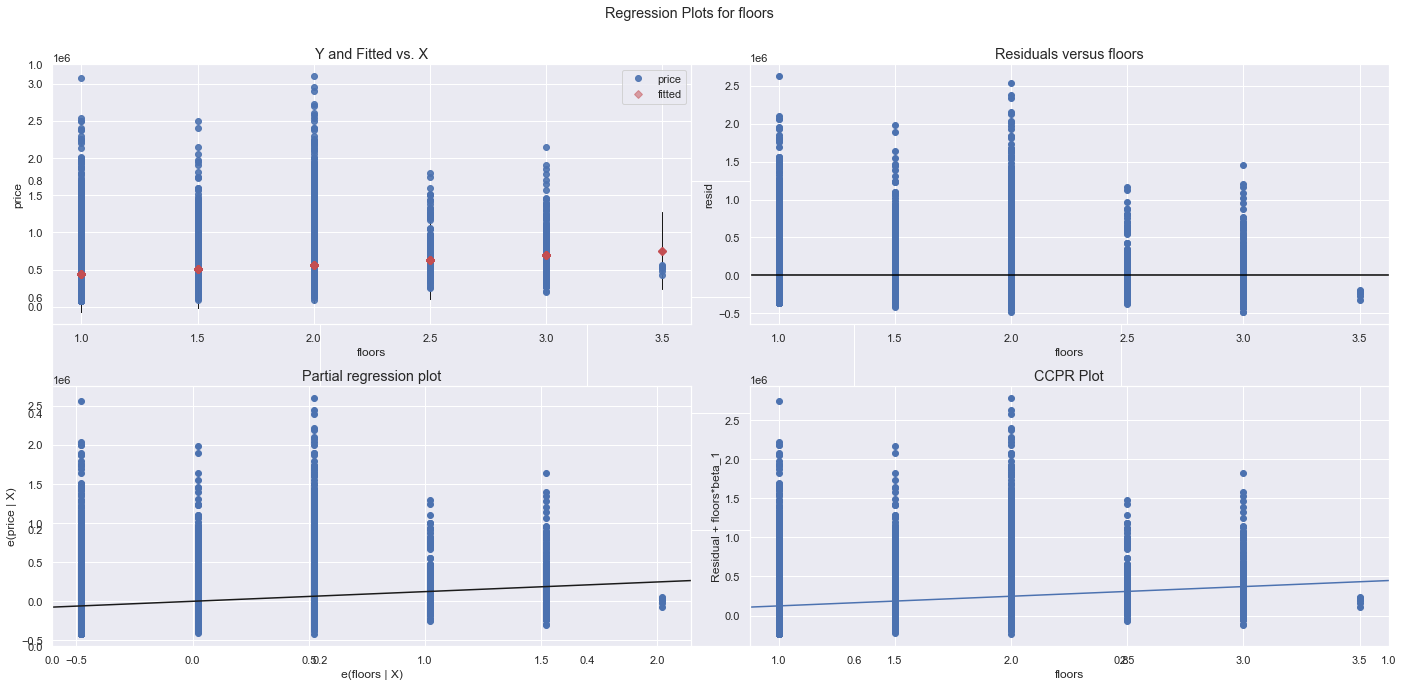

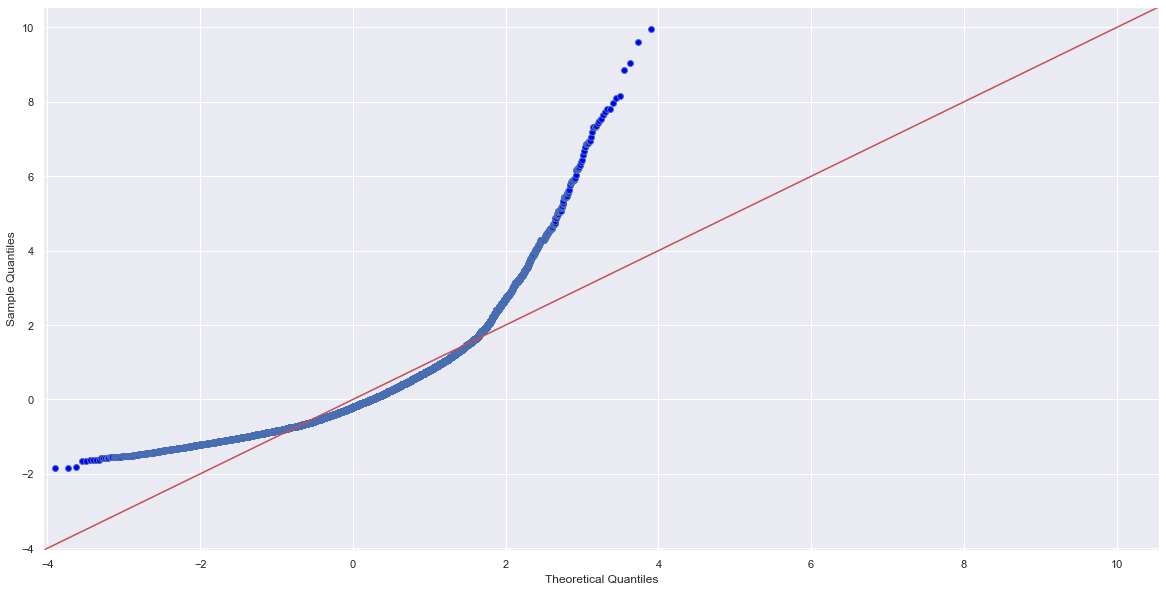

In [23]:
# Check kc_houses['floors'] initial mean, standard deviation, 
# and five-point statistics

print(kc_houses['floors'].describe())

# Visualize initial kc_houses['floors'] v kc_houses['price']

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.scatterplot(x = 'floors',
                                          y = 'price',
                                          data = kc_houses,
                                         alpha = 0.25)

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.jointplot(data = kc_houses, 
                                        x = 'floors', 
                                        y = 'price', 
                                        kind = 'reg')

floors_model1 = smf.ols(formula = f'price ~ floors', data = kc_houses).fit()

fig, axes = plt.subplots(figsize = (20, 10))
fig = sm.graphics.plot_regress_exog(floors_model1, 'floors', fig = fig)
fig = sm.graphics.qqplot(floors_model1.resid, dist = stats.norm, line = '45', fit = True)
plt.show()

### Condition

count    20763.000000
mean         3.414535
std          0.652483
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64


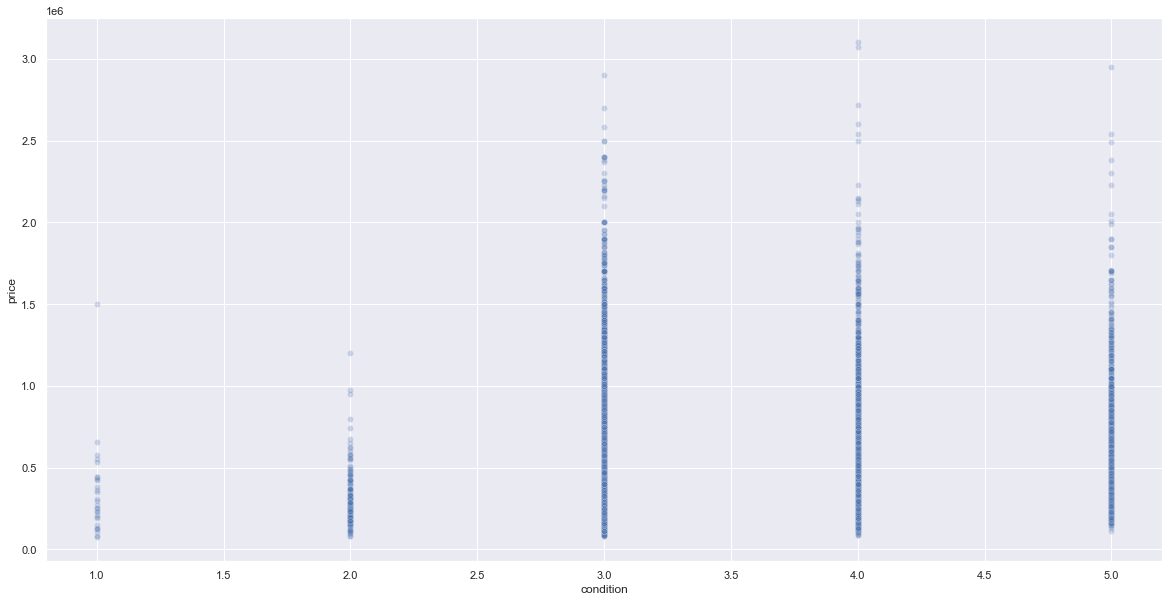

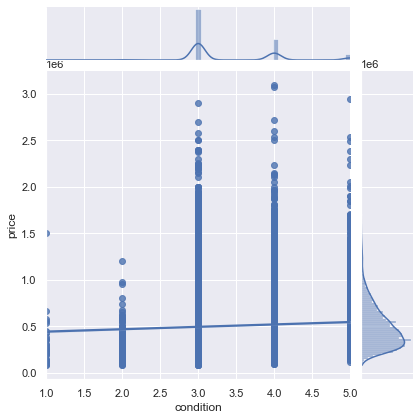

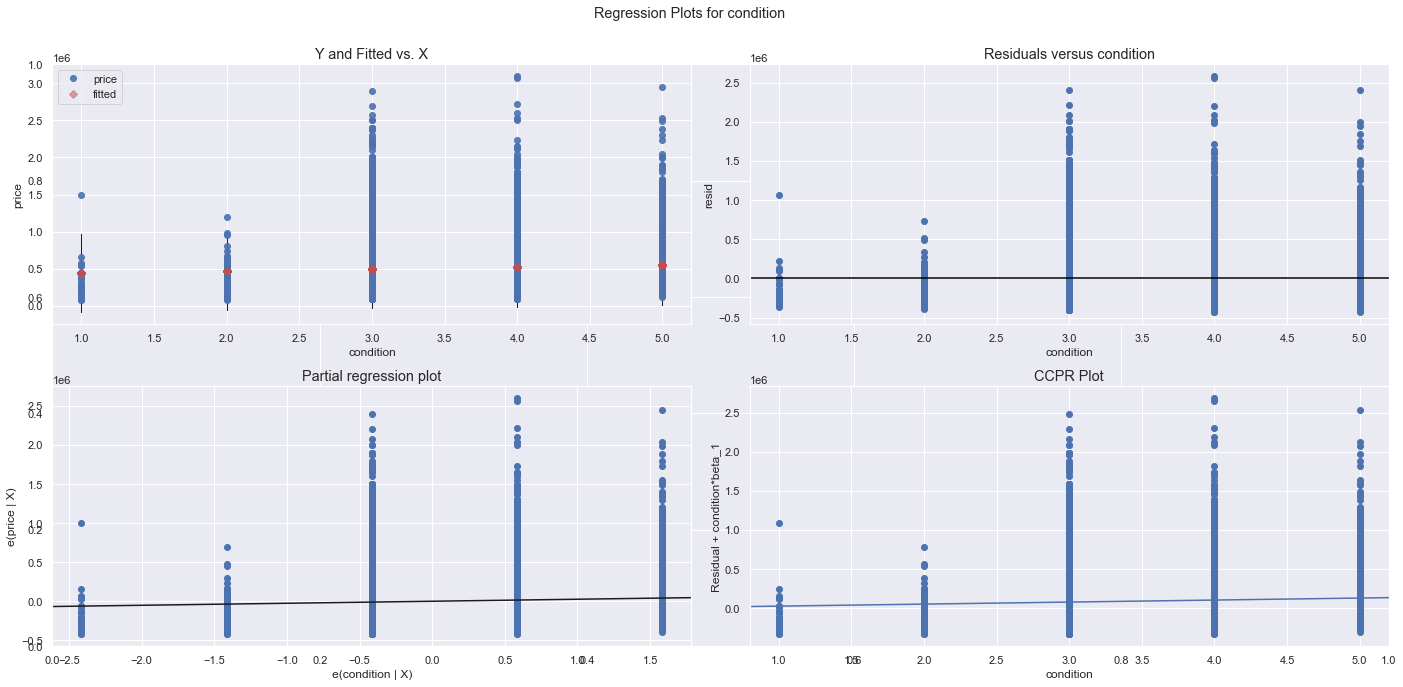

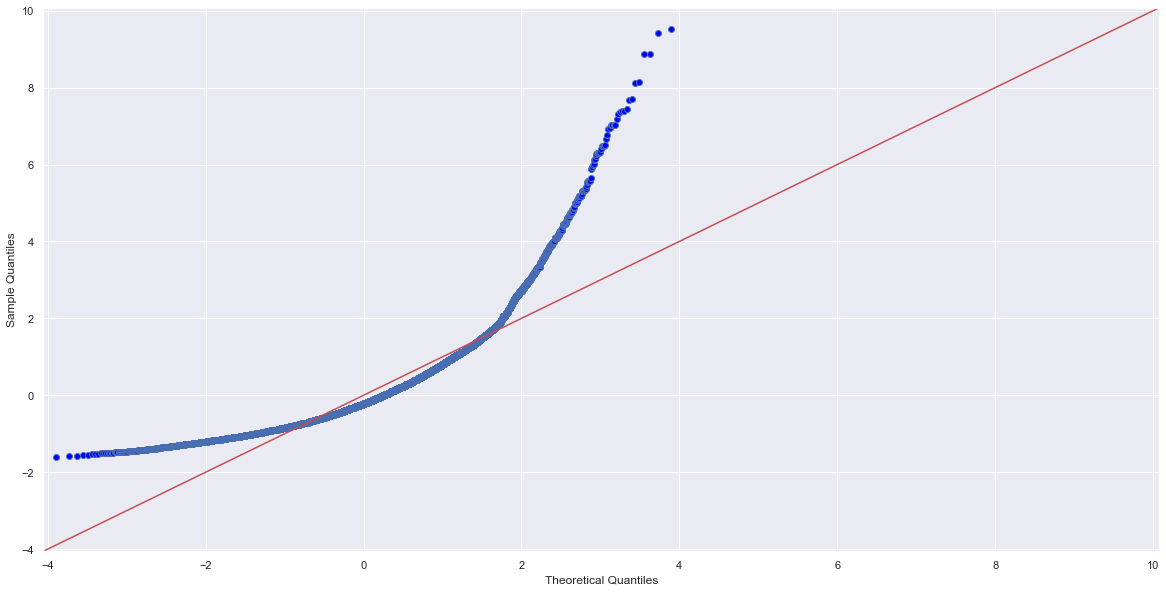

In [24]:
# Check kc_houses['condition'] initial mean, standard deviation, 
# and five-point statistics

print(kc_houses['condition'].describe())

# Visualize initial kc_houses['condition'] v kc_houses['price']

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.scatterplot(x = 'condition',
                                          y = 'price',
                                          data = kc_houses,
                                         alpha = 0.25)

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.jointplot(data = kc_houses, 
                                        x = 'condition', 
                                        y = 'price', 
                                        kind = 'reg')

condition_model1 = smf.ols(formula = f'price ~ condition', data = kc_houses).fit()

fig, axes = plt.subplots(figsize = (20, 10))
fig = sm.graphics.plot_regress_exog(condition_model1, 'condition', fig = fig)
fig = sm.graphics.qqplot(condition_model1.resid, dist = stats.norm, line = '45', fit = True)
plt.show()

### Grade

count    20763.000000
mean         7.558060
std          1.052214
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         12.000000
Name: grade, dtype: float64


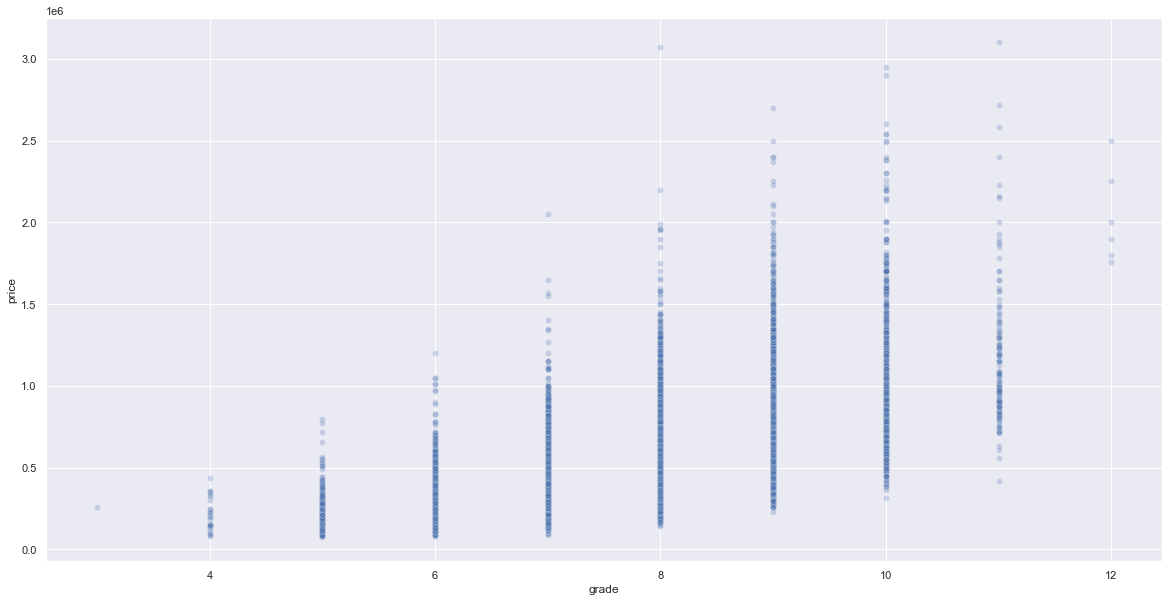

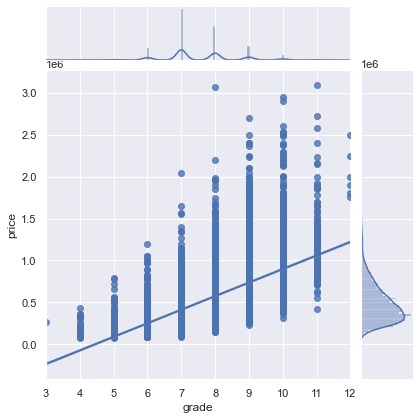

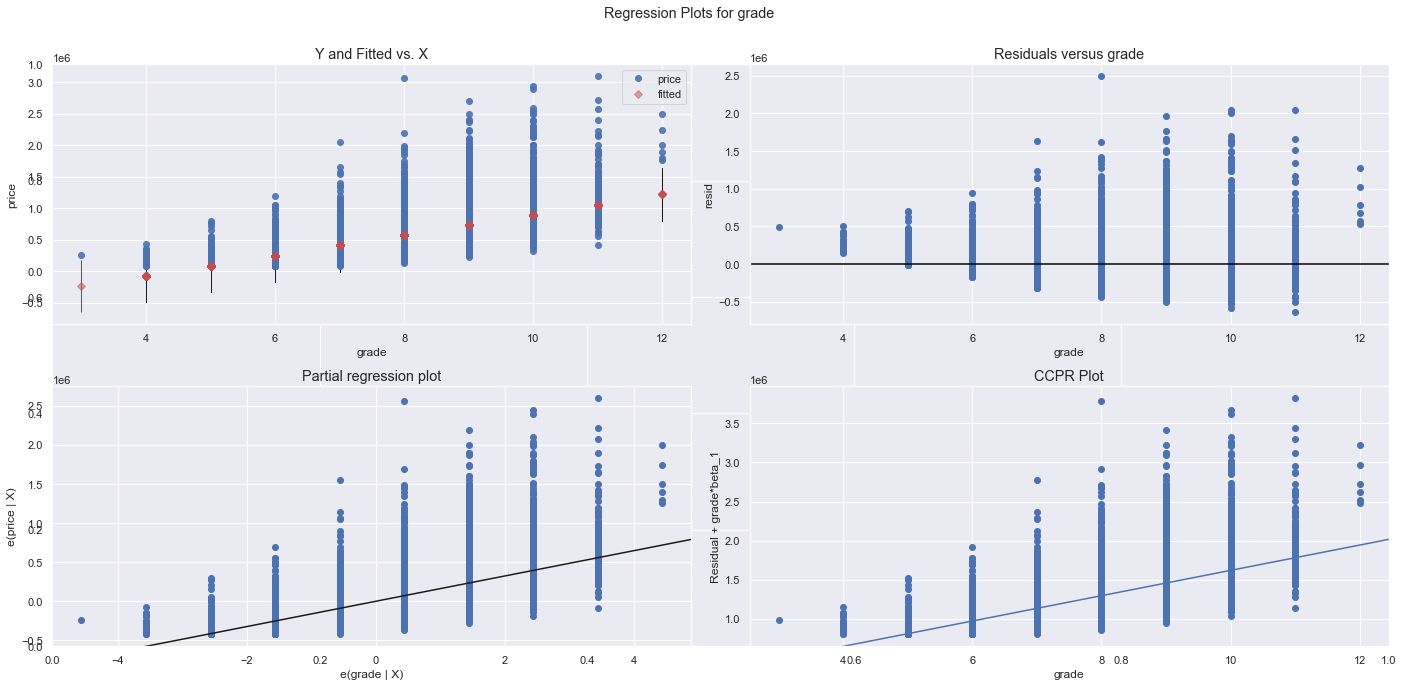

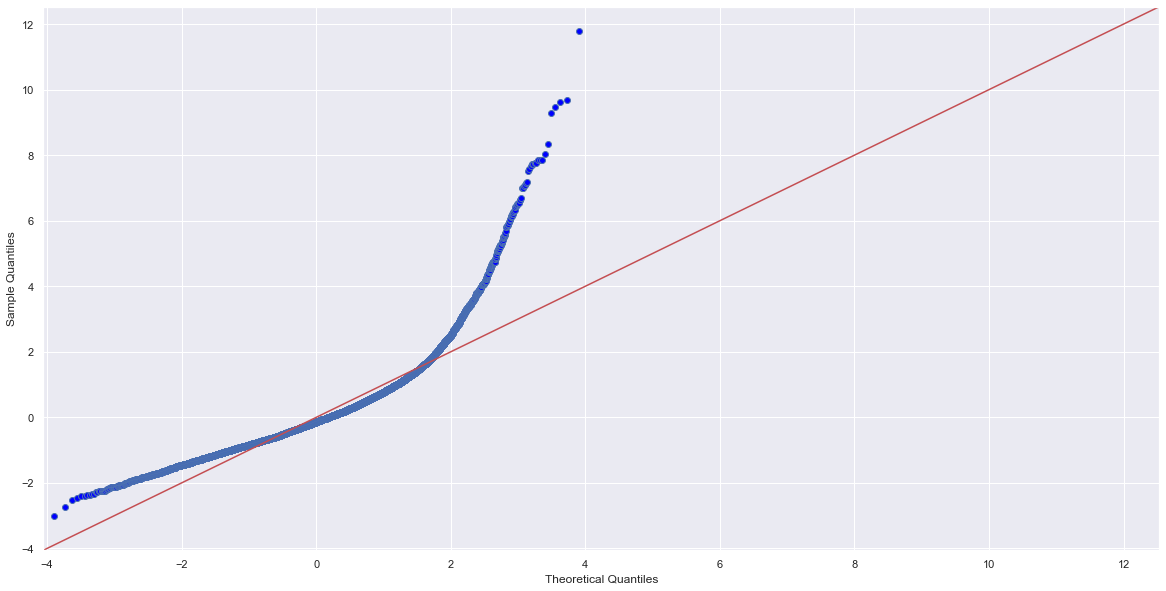

In [25]:
# Check kc_houses['grade'] initial mean, standard deviation, 
# and five-point statistics

print(kc_houses['grade'].describe())

# Visualize initial kc_houses['grade'] v kc_houses['price']

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.scatterplot(x = 'grade',
                                          y = 'price',
                                          data = kc_houses,
                                         alpha = 0.25)

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.jointplot(data = kc_houses, 
                                        x = 'grade', 
                                        y = 'price', 
                                        kind = 'reg')

grade_model1 = smf.ols(formula = f'price ~ grade', data = kc_houses).fit()

fig, axes = plt.subplots(figsize = (20, 10))
fig = sm.graphics.plot_regress_exog(grade_model1, 'grade', fig = fig)
fig = sm.graphics.qqplot(grade_model1.resid, dist = stats.norm, line = '45', fit = True)
plt.show()

### Year Built

count    20763.000000
mean      1970.359052
std         29.309032
min       1900.000000
25%       1951.000000
50%       1973.000000
75%       1995.000000
max       2015.000000
Name: yr_built, dtype: float64


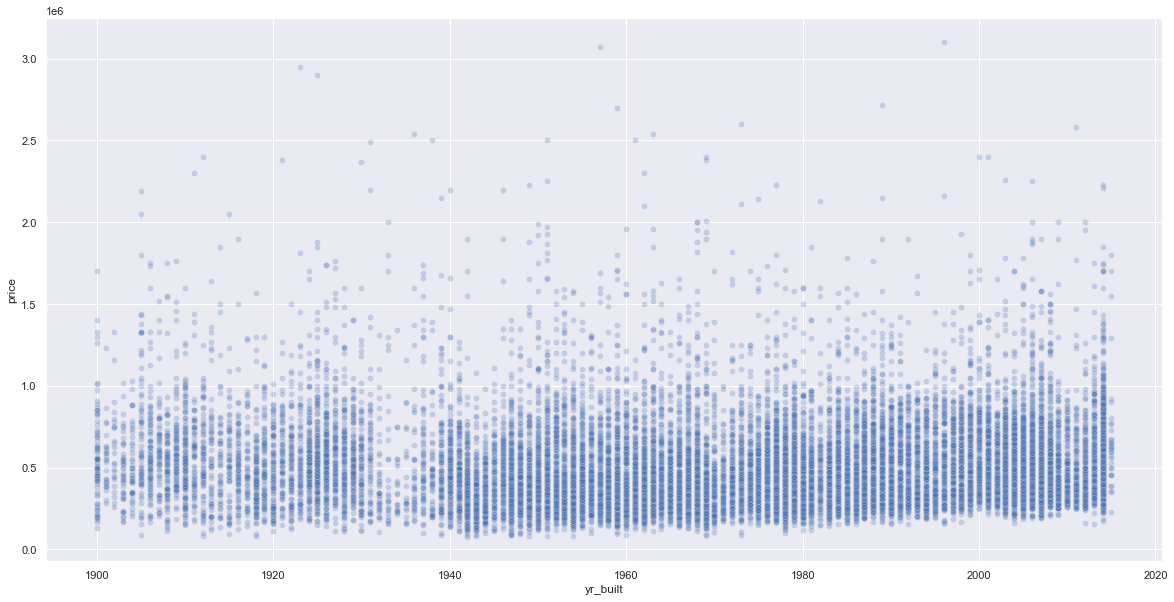

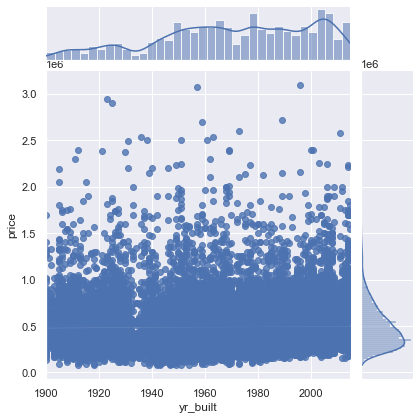

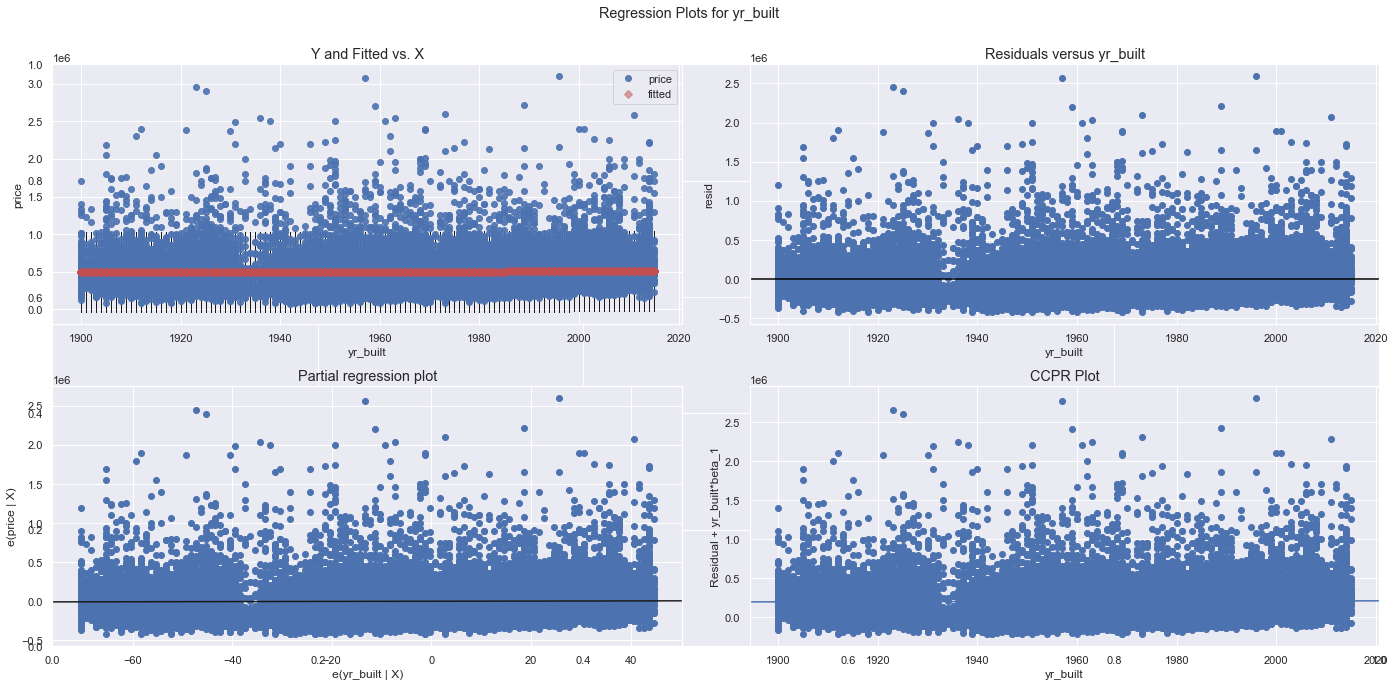

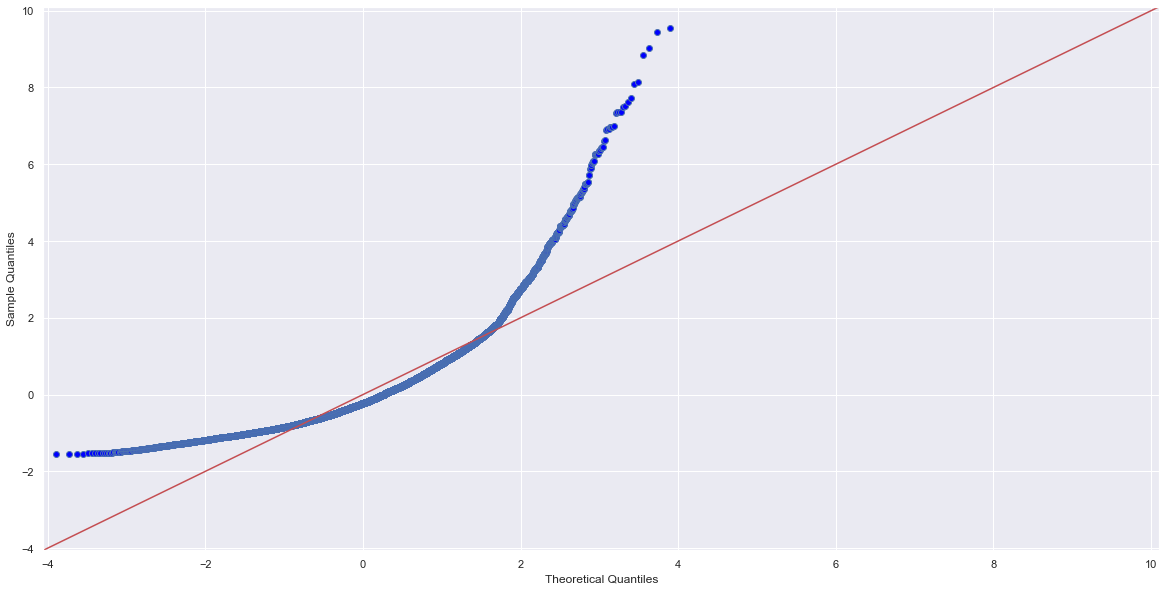

In [26]:
# Check kc_houses['yr_built'] initial mean, standard deviation, 
# and five-point statistics

print(kc_houses['yr_built'].describe())

# Visualize initial kc_houses['yr_built'] v kc_houses['price']

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.scatterplot(x = 'yr_built',
                                          y = 'price',
                                          data = kc_houses,
                                         alpha = 0.25)

sns.set(rc = {'figure.figsize' : (20, 10)})
plot_kc_houses_bedrooms = sns.jointplot(data = kc_houses, 
                                        x = 'yr_built', 
                                        y = 'price', 
                                        kind = 'reg')

yr_built_model1 = smf.ols(formula = f'price ~ yr_built', data = kc_houses).fit()

fig, axes = plt.subplots(figsize = (20, 10))
fig = sm.graphics.plot_regress_exog(yr_built_model1, 'yr_built', fig = fig)
fig = sm.graphics.qqplot(yr_built_model1.resid, dist = stats.norm, line = '45', fit = True)
plt.show()

## Review Data Cleaning

In [27]:
# Count total rows dropped

print(initial_count - len(kc_houses))

# Calculate total percentage of rows dropped

print(1 - (len(kc_houses) / initial_count))

834
0.038616474510348664


Following the intitial cleaning of the data, removing identified outliers, only 7.27% of the total rows were removed for the selected features.

In [28]:
# Check updated kc_houses data types and row counts

kc_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20763 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20763 non-null  float64
 1   bedrooms     20763 non-null  int64  
 2   bathrooms    20763 non-null  float64
 3   sqft_living  20763 non-null  int64  
 4   floors       20763 non-null  float64
 5   condition    20763 non-null  int64  
 6   grade        20763 non-null  int64  
 7   yr_built     20763 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.4 MB


In [29]:
# Check kc_houses updated mean, standard deviation, and five-point statistics

kc_houses.describe()

price      bedrooms     bathrooms   sqft_living        floors  \
count  2.076300e+04  20763.000000  20763.000000  20763.000000  20763.000000   
mean   5.026777e+05      3.322160      2.053810   1975.206088      1.477725   
std    2.717419e+05      0.856984      0.697054    740.702788      0.537866   
min    7.800000e+04      1.000000      0.500000    370.000000      1.000000   
25%    3.170000e+05      3.000000      1.500000   1410.000000      1.000000   
50%    4.400000e+05      3.000000      2.250000   1870.000000      1.000000   
75%    6.165000e+05      4.000000      2.500000   2460.000000      2.000000   
max    3.100000e+06      6.000000      4.500000   4000.000000      3.500000   

          condition         grade      yr_built  
count  20763.000000  20763.000000  20763.000000  
mean       3.414535      7.558060   1970.359052  
std        0.652483      1.052214     29.309032  
min        1.000000      3.000000   1900.000000  
25%        3.000000      7.000000   1951.000000  
50%        3.000000      7.000000   1973.000000  
75%        4.000000      8.000000   1995.000000  
max        5.000000     12.000000   2015.000000

# Normalize Data

In [30]:
def normalize_features(series):
    return (series - series.mean()) / series.std()
for features in ['bedrooms', 'bathrooms', 'sqft_living', 'grade']:
    kc_houses[features] = normalize_features(kc_houses[features])

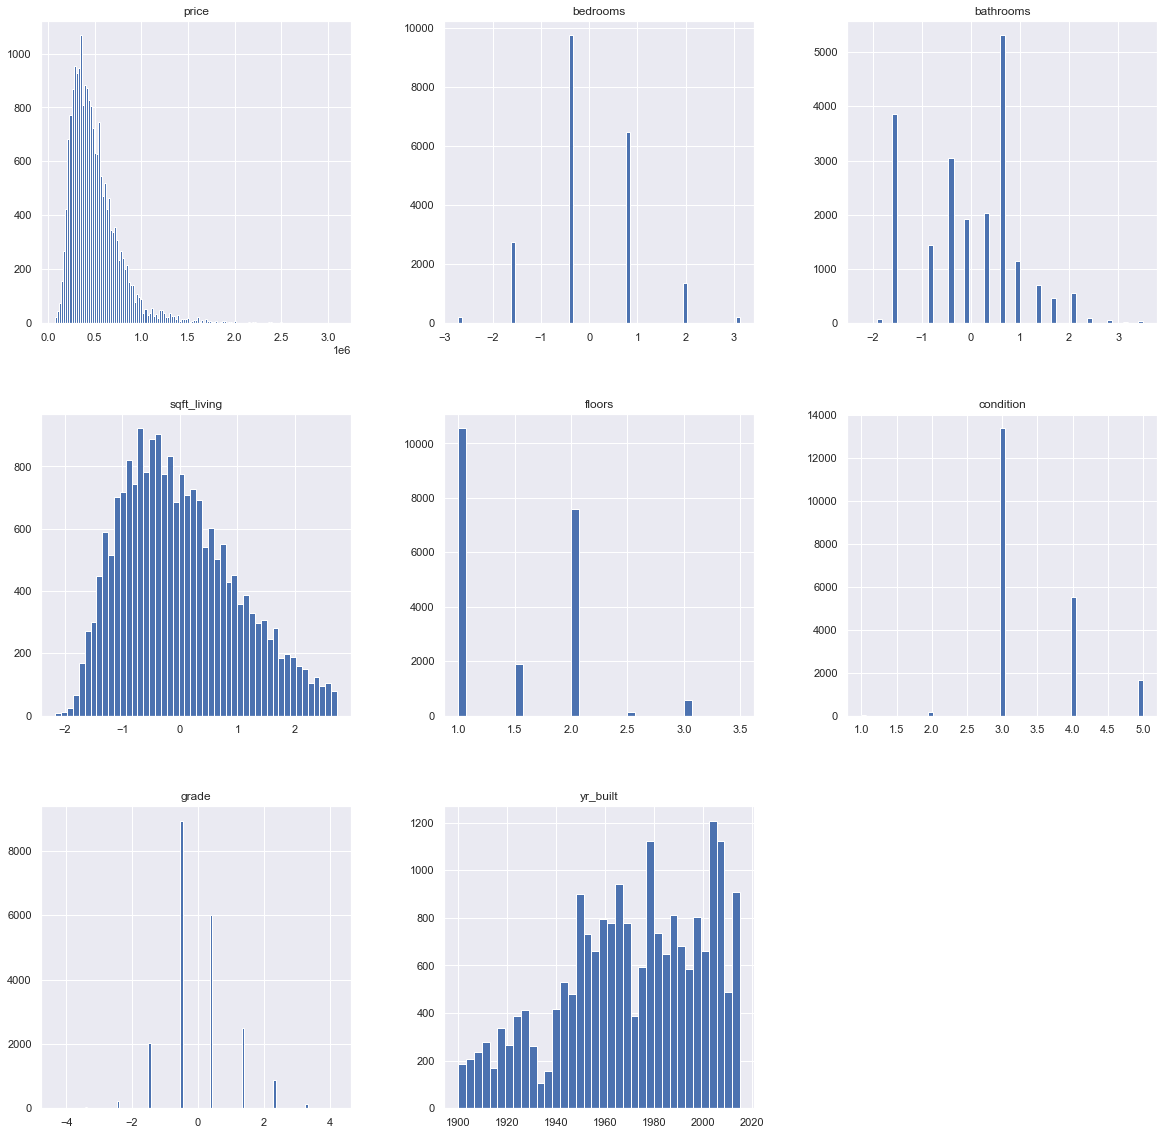

In [31]:
# Visualize the distribution of the updated data for kc_houses with histograms

kc_houses.hist(figsize=(20,20), bins = 'auto');

# Categories

In [32]:
# Define features as categories

kc_houses['floors'] = kc_houses['floors'].astype('category')
kc_houses['grade'] = kc_houses['grade'].astype('category')
kc_houses['condition'] = kc_houses['condition'].astype('category')

# Model 1

In [33]:
# Split kc_houses data in train and test sets

train1, test1 = train_test_split(kc_houses, test_size = 0.1, random_state = 6)

In [34]:
# Fit model to updated kc_houses train data
# Display model summary

model1_outcome = 'price'
model1_columns = list(train1.columns)
model1_columns.remove('price')
model1_predictors = '+'.join(model1_columns)
model1_formula = model1_outcome + '~' + model1_predictors
model1 = ols(formula = model1_formula, data = train1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     1140.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        03:15:27   Log-Likelihood:            -2.5241e+05
No. Observations:               18686   AIC:                         5.049e+05
Df Residuals:                   18663   BIC:                         5.050e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     6.981e+06   2.21e+05     31.607      0.000    6.55e+06    7.41e+06
floors[T.1.5]                 4196.6422   4992.304      0.841      0.401   -5588.729     1.4e+04
floors[T.2.0]                 1.007e+04   3719.327      2.706      0.007    2775.048    1.74e+04
floors[T.2.5]                 4.666e+04    1.7e+04      2.740      0.006    1.33e+04       8e+04
floors[T.3.0]                 1.332e+05   8776.345     15.182      0.000    1.16e+05     1.5e+05
floors[T.3.5]                 1.264e+05   7.97e+04      1.586      0.113   -2.99e+04    2.83e+05
condition[T.2]               -2.277e+04   3.92e+04     -0.581      0.561   -9.96e+04    5.41e+04
condition[T.3]                2.396e+04   3.66e+04      0.654      0.513   -4.79e+04    9.58e+04
condition[T.4]                3.857e+04   3.67e+04      1.052      0.293   -3.33e+04     1.1e+05
condition[T.5]                7.565e+04   3.69e+04      2.053      0.040    3407.573    1.48e+05
grade[T.-3.3814969026964716]  5.122e+04   1.82e+05      0.282      0.778   -3.05e+05    4.08e+05
grade[T.-2.431120323148488]    3.79e+04   1.78e+05      0.212      0.832   -3.12e+05    3.88e+05
grade[T.-1.4807437436005044]   9.53e+04   1.78e+05      0.535      0.593   -2.54e+05    4.44e+05
grade[T.-0.5303671640525208]  1.909e+05   1.78e+05      1.072      0.284   -1.58e+05     5.4e+05
grade[T.0.42000941549546267]  3.007e+05   1.78e+05      1.688      0.091   -4.84e+04     6.5e+05
grade[T.1.3703859950434463]   4.662e+05   1.78e+05      2.616      0.009    1.17e+05    8.15e+05
grade[T.2.3207625745914298]    6.27e+05   1.78e+05      3.516      0.000    2.77e+05    9.76e+05
grade[T.3.2711391541394135]   8.166e+05   1.79e+05      4.564      0.000    4.66e+05    1.17e+06
grade[T.4.221515733687397]    1.567e+06   1.95e+05      8.023      0.000    1.18e+06    1.95e+06
bedrooms                     -2.241e+04   1707.564    -13.126      0.000   -2.58e+04   -1.91e+04
bathrooms                      3.44e+04   2202.976     15.616      0.000    3.01e+04    3.87e+04
sqft_living                   9.121e+04   2502.119     36.454      0.000    8.63e+04    9.61e+04
yr_built                     -3443.4793     65.022    -52.959      0.000   -3570.928   -3316.030
==============================================================================
Omnibus:                     8206.171   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95680.932
Skew:                           1.797   Prob(JB):                         0.00
Kurtosis:                      13.487   Cond. No.                     8.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

In [37]:
# Calculate multicollinearity

model1_features = train1[model1_columns]
model1_vif = [
    variance_inflation_factor(model1_features.values, i)
    for i in range(model1_features.shape[1])]
list(zip(model1_columns, model1_vif))

[('bedrooms', 1.6588785838675988),
 ('bathrooms', 2.4773348515072775),
 ('sqft_living', 3.4127924577058555),
 ('floors', 13.167396109855739),
 ('condition', 29.59310608671423),
 ('grade', 2.364778990095052),
 ('yr_built', 48.79092600359052)]

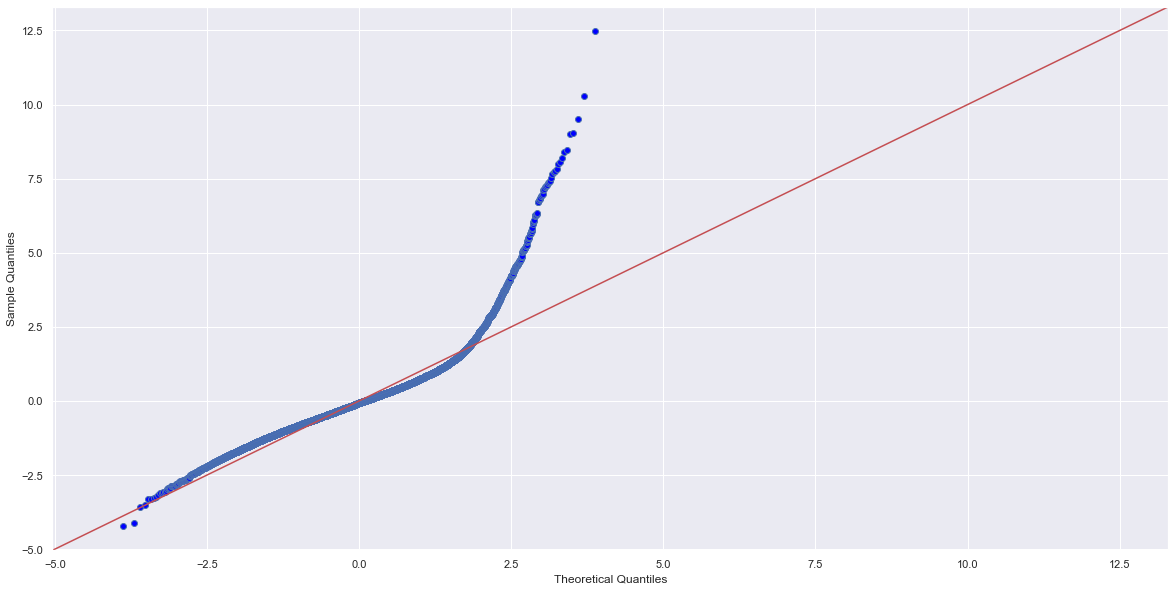

In [38]:
# Visualize normality with QQplot

fig = sm.graphics.qqplot(model1.resid, dist = stats.norm, line = '45', fit = True)

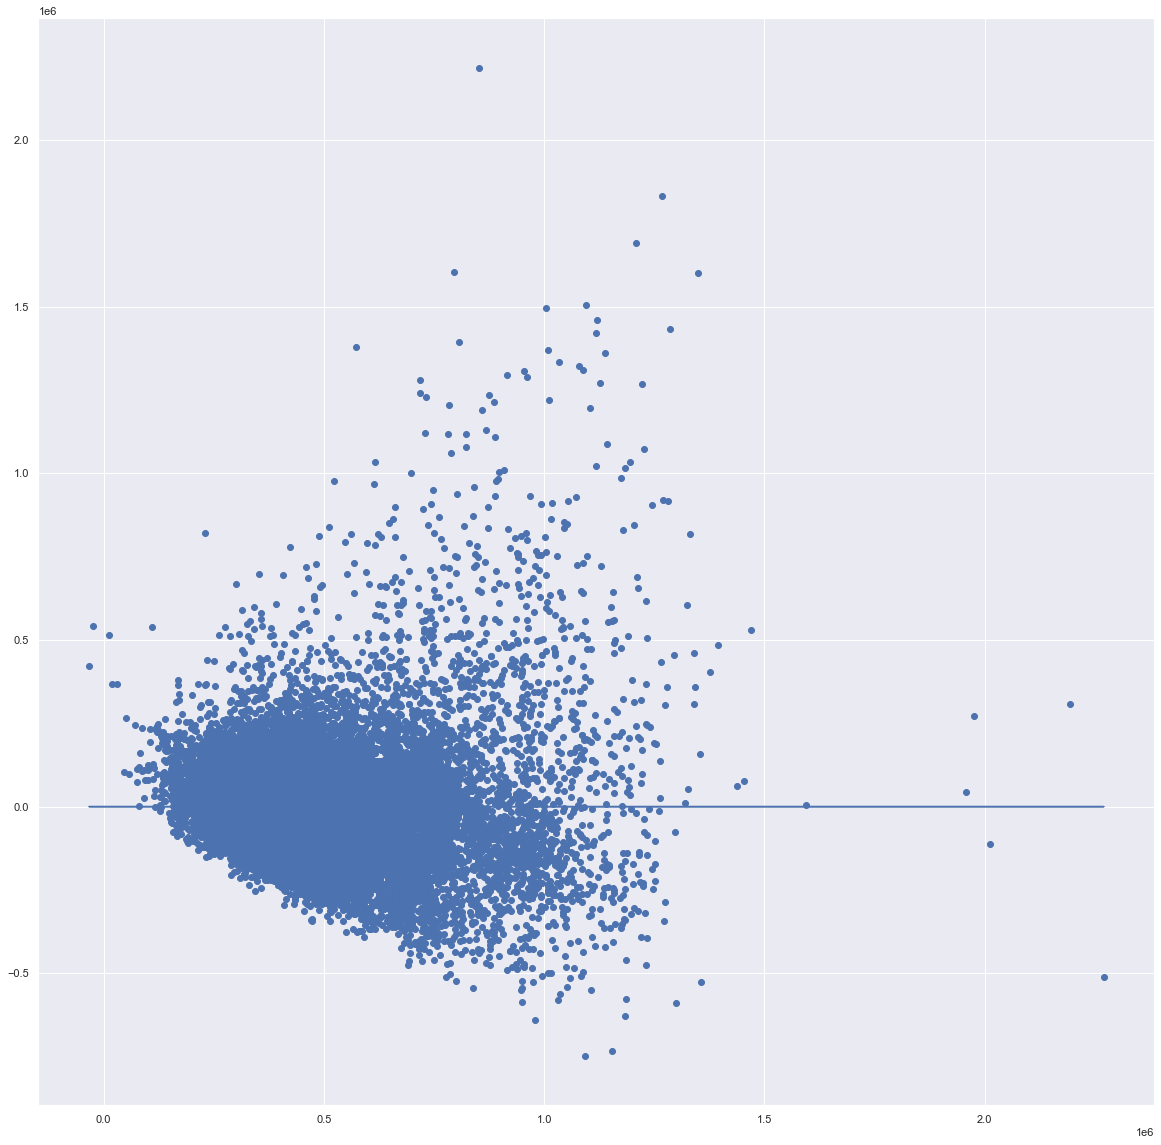

In [39]:
# Visualize homoscedasticity

fig, axes = plt.subplots(figsize = (20,20))
plt.scatter(model1.predict(train1[model1_columns]), model1.resid)
plt.plot(model1.predict(train1[model1_columns]), [0 for i in range(len(train1))])

In [40]:
pickle.dump(model1, open('kc_houses_model1.pkl','wb'))

# Model 2

In [41]:
# Create second data set to edit for Model 2
# Remove columns based on Model 1 p-values:
# 'condition', 'grade', and 'yr_built'

kc_houses2 = kc_houses.drop(['condition', 'grade', 'yr_built'],
                            axis = 1)

In [42]:
# Split kc_houses2 data in train and test sets

train2, test2 = train_test_split(kc_houses2, test_size = 0.1, random_state = 8)

In [43]:
# Fit model to updated kc_houses2 train data
# Display model summary

model2_outcome = 'price'
model2_columns = list(train2.columns)
model2_columns.remove('price')
model2_predictors = '+'.join(model2_columns)
model2_formula = model2_outcome + '~' + model2_predictors
model2 = ols(formula = model2_formula, data = train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     1585.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        03:17:47   Log-Likelihood:            -2.5549e+05
No. Observations:               18686   AIC:                         5.110e+05
Df Residuals:                   18677   BIC:                         5.111e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.968e+05   2318.636    214.260      0.000    4.92e+05    5.01e+05
floors[T.1.5]   8.72e+04   5590.072     15.599      0.000    7.62e+04    9.82e+04
floors[T.2.0]  -1.79e+04   3967.235     -4.511      0.000   -2.57e+04   -1.01e+04
floors[T.2.5]  1.168e+05      2e+04      5.838      0.000    7.76e+04    1.56e+05
floors[T.3.0]  1.062e+05   9709.441     10.934      0.000    8.71e+04    1.25e+05
floors[T.3.5]  7.443e+04   1.05e+05      0.709      0.478   -1.31e+05     2.8e+05
bedrooms      -4.261e+04   1959.363    -21.749      0.000   -4.65e+04   -3.88e+04
bathrooms      8718.2006   2461.387      3.542      0.000    3893.657    1.35e+04
sqft_living    1.913e+05   2439.336     78.439      0.000    1.87e+05    1.96e+05
==============================================================================
Omnibus:                     8134.957   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72351.372
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                      11.886   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared decreased to 0.362 for Model 2 from 0.544 for Model 1, however, this is acceptable in-context due to the poor p-values for the removed columns and the improved intercept coeficient of 4.778e+05 for Model 2 from 6.615e+06 from Model 1, being closer to the actual price mean.

In [45]:
# Calculate multicollinearity

model2_features = train2[model2_columns]
model2_vif = [
    variance_inflation_factor(model2_features.values, i)
    for i in range(model2_features.shape[1])]
list(zip(model2_columns, model2_vif))

[('bedrooms', 1.5831639898845056),
 ('bathrooms', 2.0873925554542474),
 ('sqft_living', 2.435398319553435),
 ('floors', 1.03163231394254)]

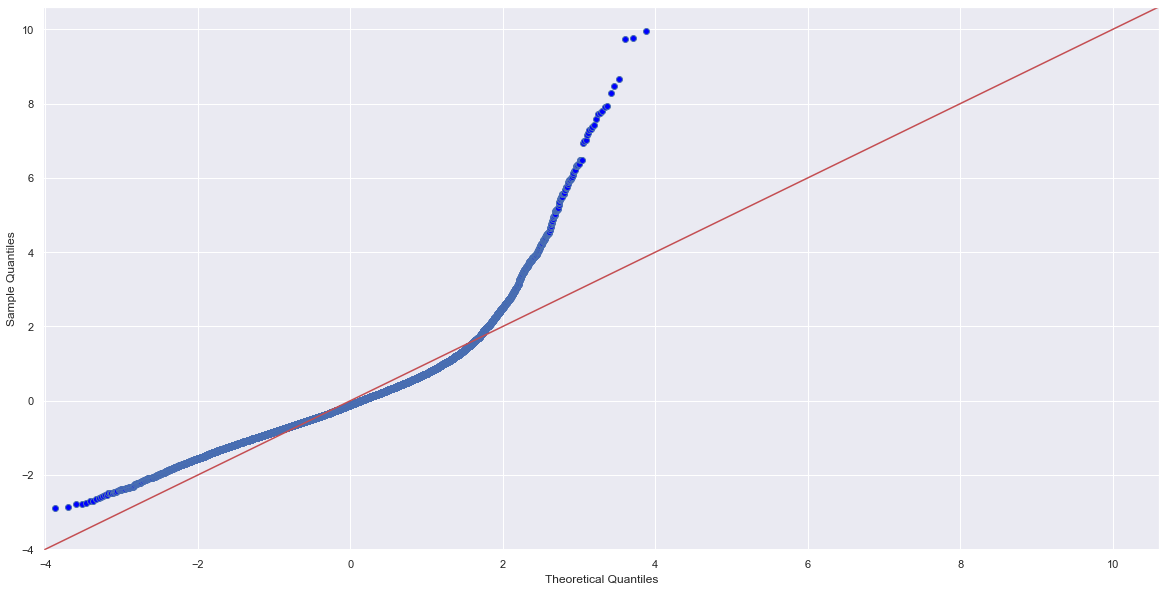

In [46]:
# Visualize normality with QQplot

fig = sm.graphics.qqplot(model2.resid, dist = stats.norm, line = '45', fit = True)

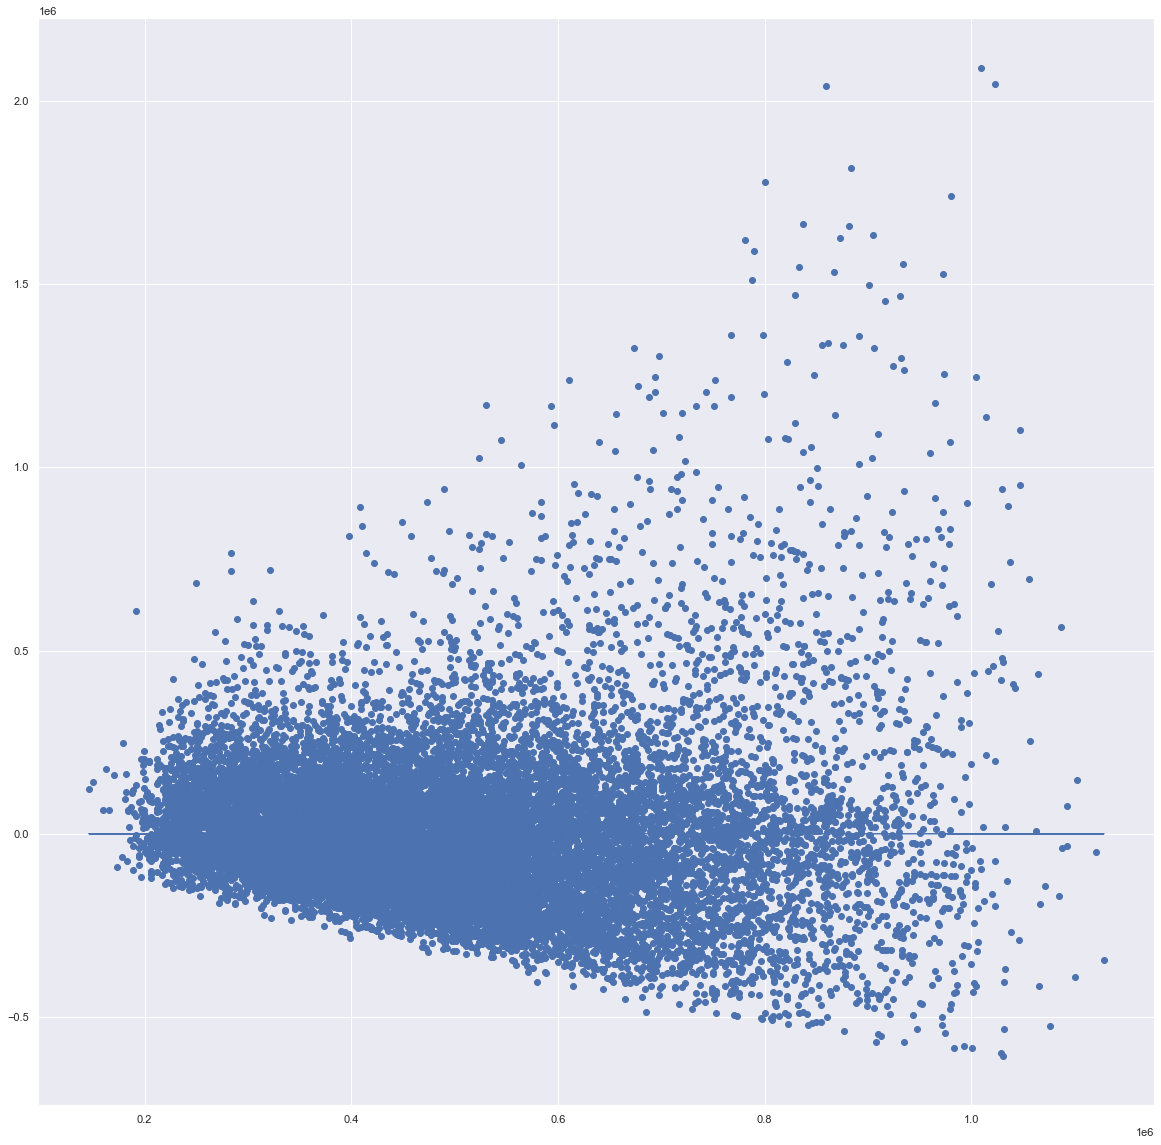

In [47]:
# Visualize homoscedasticity

fig, axes = plt.subplots(figsize = (20,20))
plt.scatter(model2.predict(train2[model2_columns]), model2.resid)
plt.plot(model2.predict(train2[model2_columns]), [0 for i in range(len(train2))])

In [137]:
pickle.dump(model2, open('kc_houses_model2.pkl','wb'))

# Model 3

In [48]:
# Create third data set to edit for Model 3
# Remove columns based on Model 2 multicollinearity:
# 'floors'

kc_houses3 = kc_houses2.drop(['floors'],
                            axis = 1)

In [49]:
# Split kc_houses3 data in train and test sets

train3, test3 = train_test_split(kc_houses3, test_size = 0.1, random_state = 10)

In [50]:
# Fit model to updated kc_houses3 train data
# Display model summary

model3_outcome = 'price'
model3_columns = list(train3.columns)
model3_columns.remove('price')
model3_predictors = '+'.join(model3_columns)
model3_formula = model3_outcome + '~' + model3_predictors
model3 = ols(formula = model3_formula, data = train3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     4004.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        03:18:19   Log-Likelihood:            -2.5564e+05
No. Observations:               18686   AIC:                         5.113e+05
Df Residuals:                   18682   BIC:                         5.113e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.023e+05   1547.336    324.654      0.000    4.99e+05    5.05e+05
bedrooms    -3.792e+04   1938.150    -19.568      0.000   -4.17e+04   -3.41e+04
bathrooms    5441.4554   2218.949      2.452      0.014    1092.114    9790.797
sqft_living  1.856e+05   2410.960     76.994      0.000    1.81e+05     1.9e+05
==============================================================================
Omnibus:                     8083.616   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70523.022
Skew:                           1.861   Prob(JB):                         0.00
Kurtosis:                      11.759   Cond. No.                         2.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Calculate multicollinearity

model3_features = train3[model3_columns]
model3_vif = [
    variance_inflation_factor(model3_features.values, i)
    for i in range(model3_features.shape[1])]
list(zip(model3_columns, model3_vif))

[('bedrooms', 1.5795196564095826),
 ('bathrooms', 2.057768432494204),
 ('sqft_living', 2.4313387671773867)]

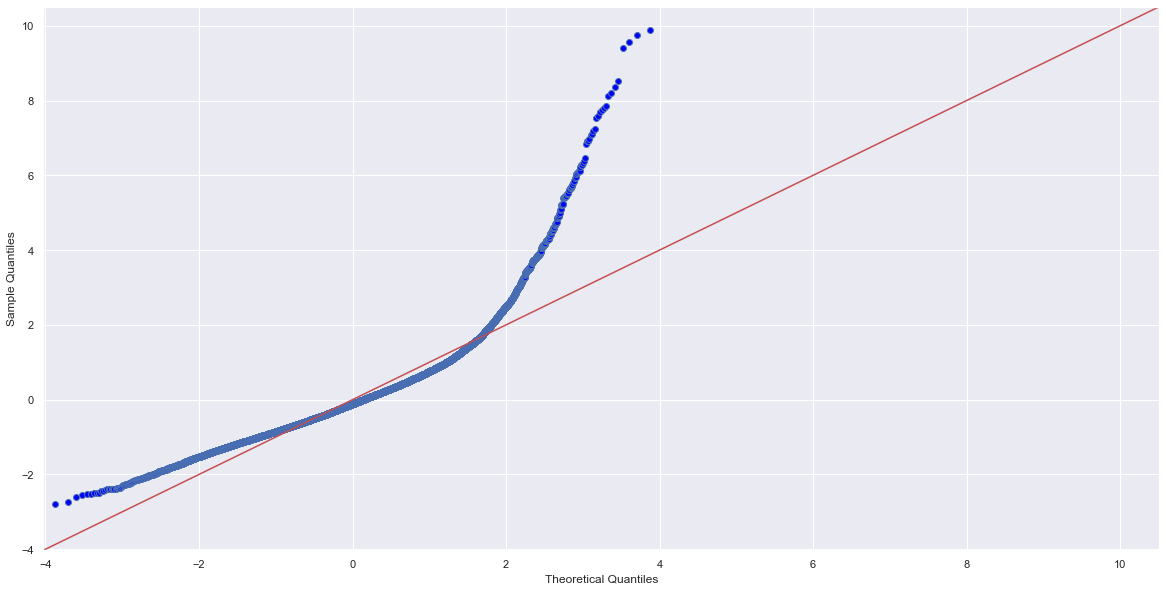

In [53]:
# Visualize normality with QQplot

fig = sm.graphics.qqplot(model3.resid, dist = stats.norm, line = '45', fit = True)

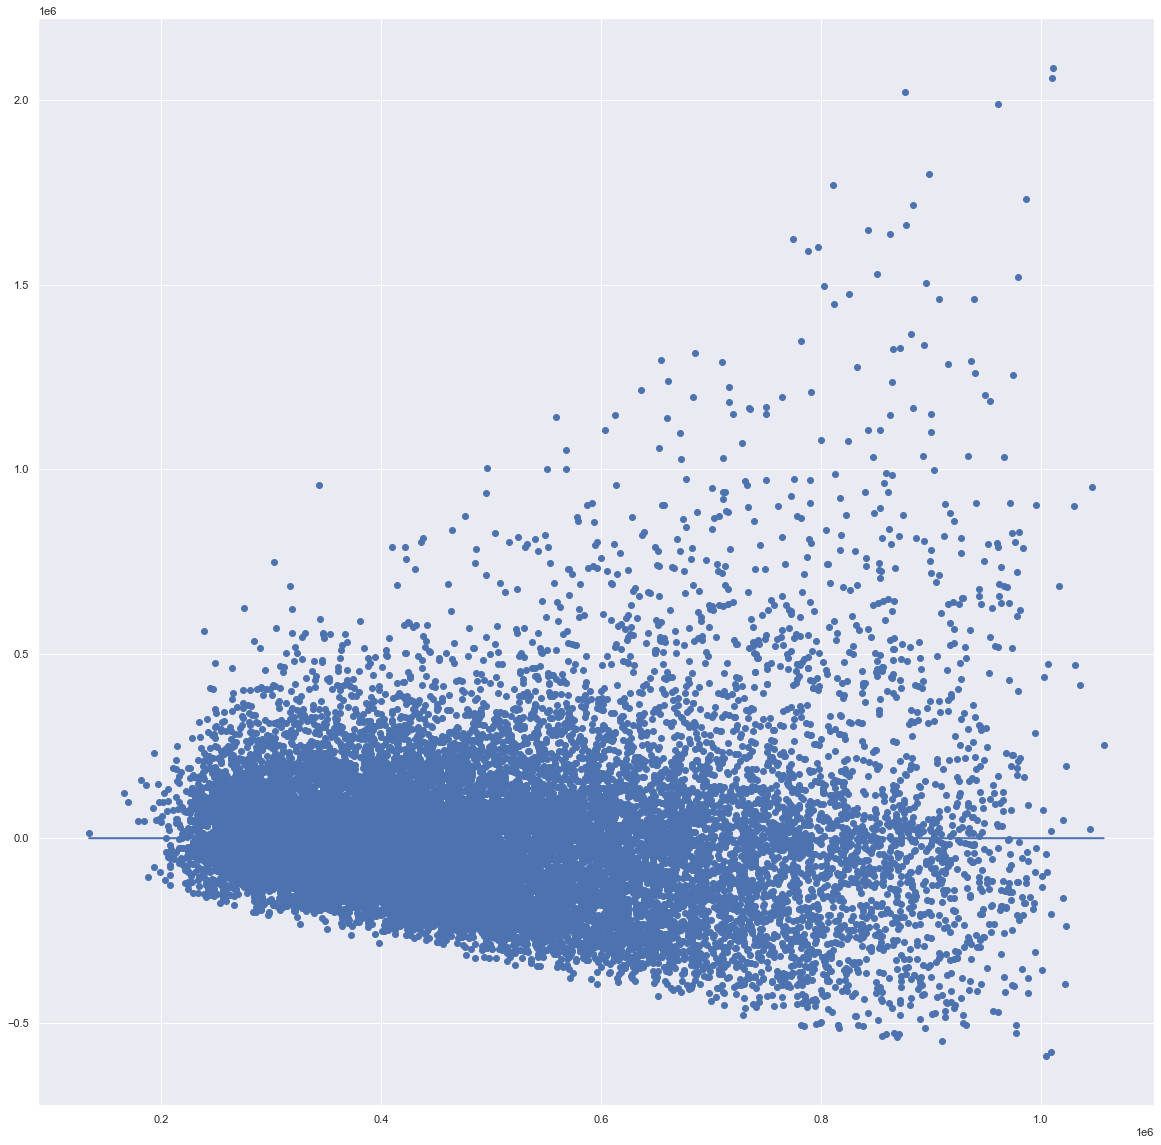

In [54]:
# Visualize homoscedasticity

fig, axes = plt.subplots(figsize = (20,20))
plt.scatter(model3.predict(train3[model3_columns]), model3.resid)
plt.plot(model3.predict(train3[model3_columns]), [0 for i in range(len(train3))])

In [138]:
pickle.dump(model3, open('kc_houses_model3.pkl','wb'))

# Model 4

In [55]:
# Check kc_houses['price'] initial mean, standard deviation, 
# and five-point statistics

print(kc_houses['price'].describe())

count    2.076300e+04
mean     5.026777e+05
std      2.717419e+05
min      7.800000e+04
25%      3.170000e+05
50%      4.400000e+05
75%      6.165000e+05
max      3.100000e+06
Name: price, dtype: float64


In [56]:
# Define kc_houses['price'] outliers
# Based on QQplot and homoscedasticity from Model 3, and
# five-point statistics

price_outliers = kc_houses3['price'] > 1000000

outliers_greater('price', 1000000)

901
0.04171875723480113


In [57]:
# Create fourth data set to edit for Model 4
# Drop price outliers
# price outliers account for only 3.24% of total data

kc_houses4 = kc_houses3.drop(kc_houses3[price_outliers].index)

In [58]:
# Count total rows dropped as of Model 4

print(initial_count - len(kc_houses4))

# Calculate total percentage of rows dropped as of Model 4

print(1 - (len(kc_houses4) / initial_count))

1735
0.08033523174514978


Following additional refining of the data, removing identified outliers, only 8.03% of the total rows were removed for the selected features.

In [59]:
# Split kc_houses4 data in train and test sets

train4, test4 = train_test_split(kc_houses4, test_size = 0.1, random_state = 11)

In [60]:
# Fit model to updated kc_houses4 train data
# Display model summary

model4_outcome = 'price'
model4_columns = list(train4.columns)
model4_columns.remove('price')
model4_predictors = '+'.join(model4_columns)
model4_formula = model4_outcome + '~' + model4_predictors
model4 = ols(formula = model4_formula, data = train4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     3320.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        03:18:49   Log-Likelihood:            -2.3898e+05
No. Observations:               17875   AIC:                         4.780e+05
Df Residuals:                   17871   BIC:                         4.780e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.723e+05   1161.606    406.586      0.000     4.7e+05    4.75e+05
bedrooms    -2.366e+04   1471.600    -16.081      0.000   -2.65e+04   -2.08e+04
bathrooms    6212.8815   1670.740      3.719      0.000    2938.069    9487.694
sqft_living  1.301e+05   1872.870     69.441      0.000    1.26e+05    1.34e+05
==============================================================================
Omnibus:                      715.380   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.896
Skew:                           0.518   Prob(JB):                    2.73e-175
Kurtosis:                       3.068   Cond. No.                         2.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Calculate multicollinearity

model4_features = train4[model4_columns]
model4_vif = [
    variance_inflation_factor(model4_features.values, i)
    for i in range(model4_features.shape[1])]
list(zip(model4_columns, model4_vif))

[('bedrooms', 1.5937782945007328),
 ('bathrooms', 1.9865904155659653),
 ('sqft_living', 2.382458928694814)]

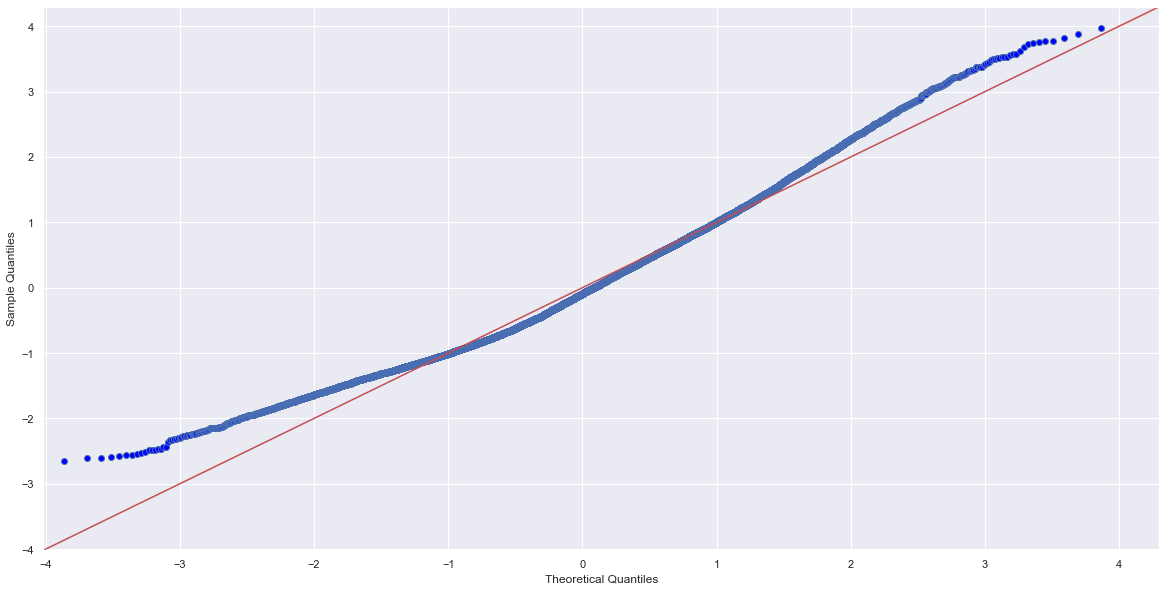

In [63]:
# Visualize normality with QQplot

fig = sm.graphics.qqplot(model4.resid, dist = stats.norm, line = '45', fit = True)

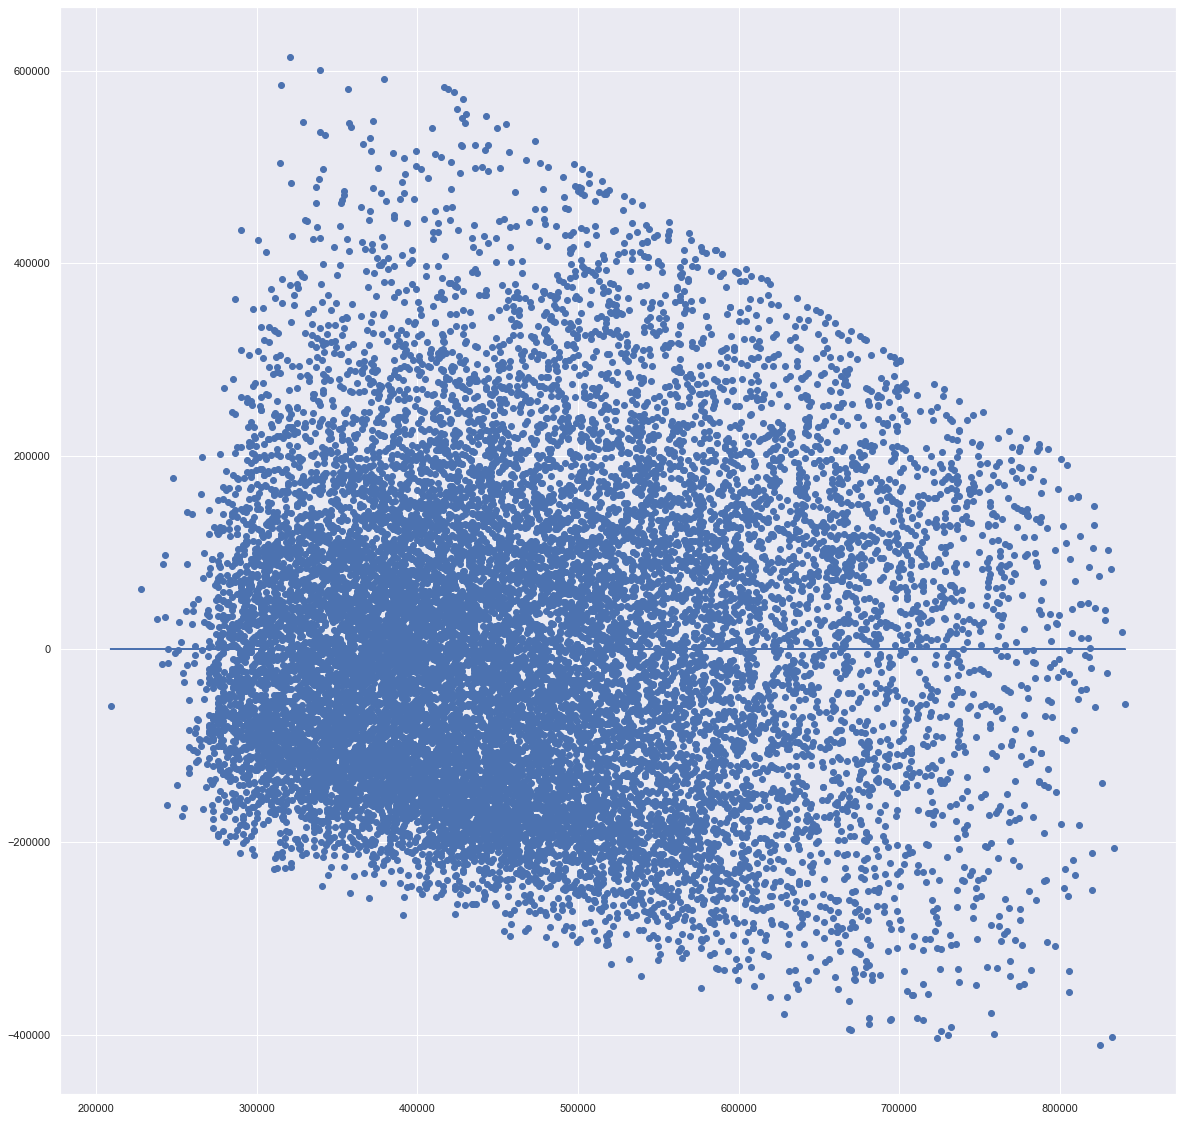

In [64]:
# Visualize homoscedasticity

fig, axes = plt.subplots(figsize = (20,20))
plt.scatter(model4.predict(train4[model4_columns]), model4.resid)
plt.plot(model4.predict(train4[model4_columns]), [0 for i in range(len(train4))])

In [139]:
pickle.dump(model4, open('kc_houses_model4.pkl','wb'))

# Model 4 Alternative

In [65]:
# Split kc_houses4 into features and price datasets

model4_alt_features = kc_houses4.drop(['price'], axis = 1)

model4_alt_price = kc_houses4.iloc[ : , 0]

In [66]:
# Split kc_houses4 features and price data in train and test sets

features_train4, features_test4, price_train4, price_test4 = train_test_split(model4_alt_features,
                                                                              model4_alt_price,
                                                                              test_size = 0.1,
                                                                              random_state = 13)

In [68]:
model4_alt = LinearRegression()
model4_alt.fit(features_train4, price_train4)

LinearRegression()

In [69]:
display(model4_alt.coef_)
display(model4_alt.intercept_)


pd.DataFrame(data = np.append(
            model4_alt.coef_, 
            model4_alt.intercept_))

array([-24260.4492629 ,   5048.65928514, 131533.60244752])

473088.14095842035

0
0  -24260.449263
1    5048.659285
2  131533.602448
3  473088.140958

In [70]:
model4_predictions = model4.predict(features_train4)
mse = mean_squared_error(price_train4, model4_predictions)
rmse = np.sqrt(mse)

print(rmse)

155317.31161323833


In [72]:
model4_scores = cross_val_score(model4,
                                model4_alt_features,
                                model4_alt_price,
                                cv = 8,
                                scoring = "neg_mean_squared_error")

model4_rmse_scores = np.sqrt(-model4_scores)

display(model4_rmse_scores)
display(model4_rmse_scores.mean())
display(model4_rmse_scores.std())

array([156026.54448957, 163592.8599818 , 154431.72149163, 153395.77464483,
       152230.31252222, 158631.03977439, 154353.18640232, 147027.9487681 ])

154961.17350936035

4508.367816905315

# Test

In [73]:
prediction = model4.predict(features_test4)

In [74]:
residuals = prediction - price_test4
residuals

17303    -48067.548879
18442   -122996.599020
9183     117867.260154
10652     39013.807907
8050    -172345.421639
             ...      
13671    104579.394389
7736       4554.990214
5167     157864.128857
20590    136206.289630
4268    -444964.356564
Name: price, Length: 1987, dtype: float64

# Conclusions

Evergreen Housing requested input regarding features which require construction (beyond basic repairs and/or cosmetic renovations) will increase the value of homes, as well as a model predicting pricing.

In analyzing the data from the houses sold in King County, Washington between September 9, 2014 and January, 10, 2015, the following features show a relationship with increased price (in order of significance):

* Square Footage of the Home
* Number of Bathrooms
* Number of Bedrooms

The recommendation would be, if a house being flipped is being considered for signification additions via construction, that increasing these features.

Surprisingly, it was found that while the grade from King County grading system showed some significance in its relationship with price, that was only the case of higher graded homes, and lower grades showed a less significant relationship.  Also, the condition of the home did not show a significant relationship with the price.

# Next Steps

* The year the home was built had a p-value which indicated possible significance, but also a high multicollinearity, which lead to it being dropped in order to better refine the model.  More time transforming this field may lead to it being able to be included in and help improve the model.

* Floors was inconsistent with its p-values when separated as a category, which lead to it being dropped in order to better refine the model.  More time transforming this field may lead to it being able to be included in and help improve the model.

* Zipcode and average square footage of house for nearest fifteen neighbors are an interesting fields, and it may be worthwhile to explore them to determine if differing areas are more or less impacted by the types of construction being considered.